# Experiment 3: Quality of the predicted distances in dimension 2

In this notebook, we perform computations corresponding to Experiment 3, described in the thesis report. Specifically, we consider the models trained during Experiment 1 on the two-dimensional datasets and measure the errors of the distances they predict for the points of both real and synthetic test datasets, comparing these predictions to ground truth values generated with Algorithm 1. Results are shown for every black box - copy - algorithm combination available and summarized through averaged tables and scatter plots that describe the relationship between the real and predicted distances.

As a remark, this particular notebook and its plots correspond to the execution with seed 42. Nevertheless, the computations shown in the tables have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase the reliability and significance of the obtained results.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d
from ucimlrepo import fetch_ucirepo
from scipy.stats import qmc
from sklearn.metrics import mean_absolute_error, mean_squared_error

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Overlapping Gaussians dataset

In [3]:
# Import dataset
data_train = np.load("../data/Synth_dataset_1_train.npz")
X_train = data_train["X"]
y_train = data_train["y"]

data_test = np.load("../data/Synth_dataset_1_test.npz")
X_test = data_test["X"]
y_test = data_test["y"]

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 2))

### Black box 1: Random Forest classifier

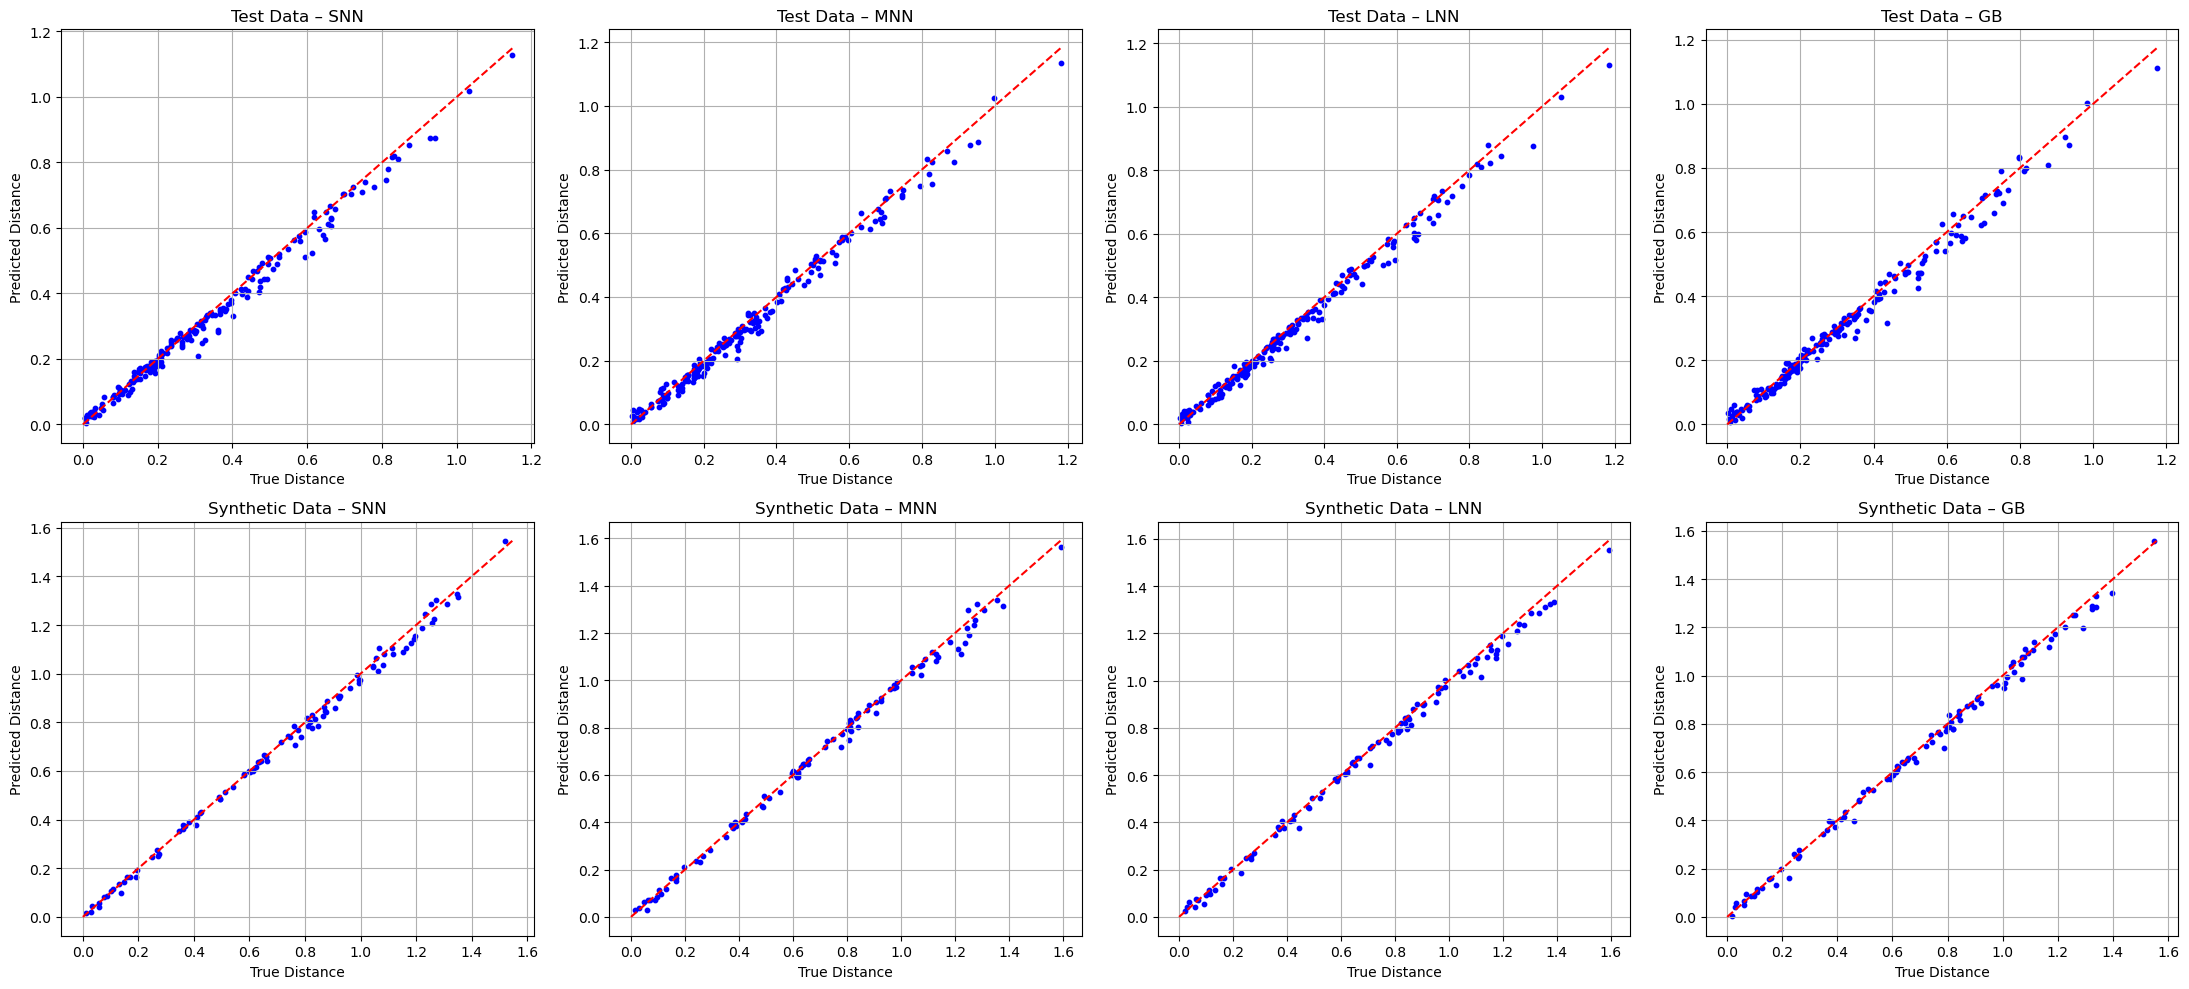


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.018318 0.002563   0.024464  0.003498
     Test Data   MNN  0.017418 0.001118   0.023453  0.002132
     Test Data   LNN  0.016730 0.002178   0.022867  0.003185
     Test Data    GB  0.019463 0.001622   0.026694  0.003345
Synthetic Data   SNN  0.019393 0.002786   0.026042  0.003906
Synthetic Data   MNN  0.018563 0.001749   0.025143  0.002356
Synthetic Data   LNN  0.018677 0.004550   0.024724  0.005401
Synthetic Data    GB  0.019164 0.002050   0.027248  0.002918


In [4]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS1_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

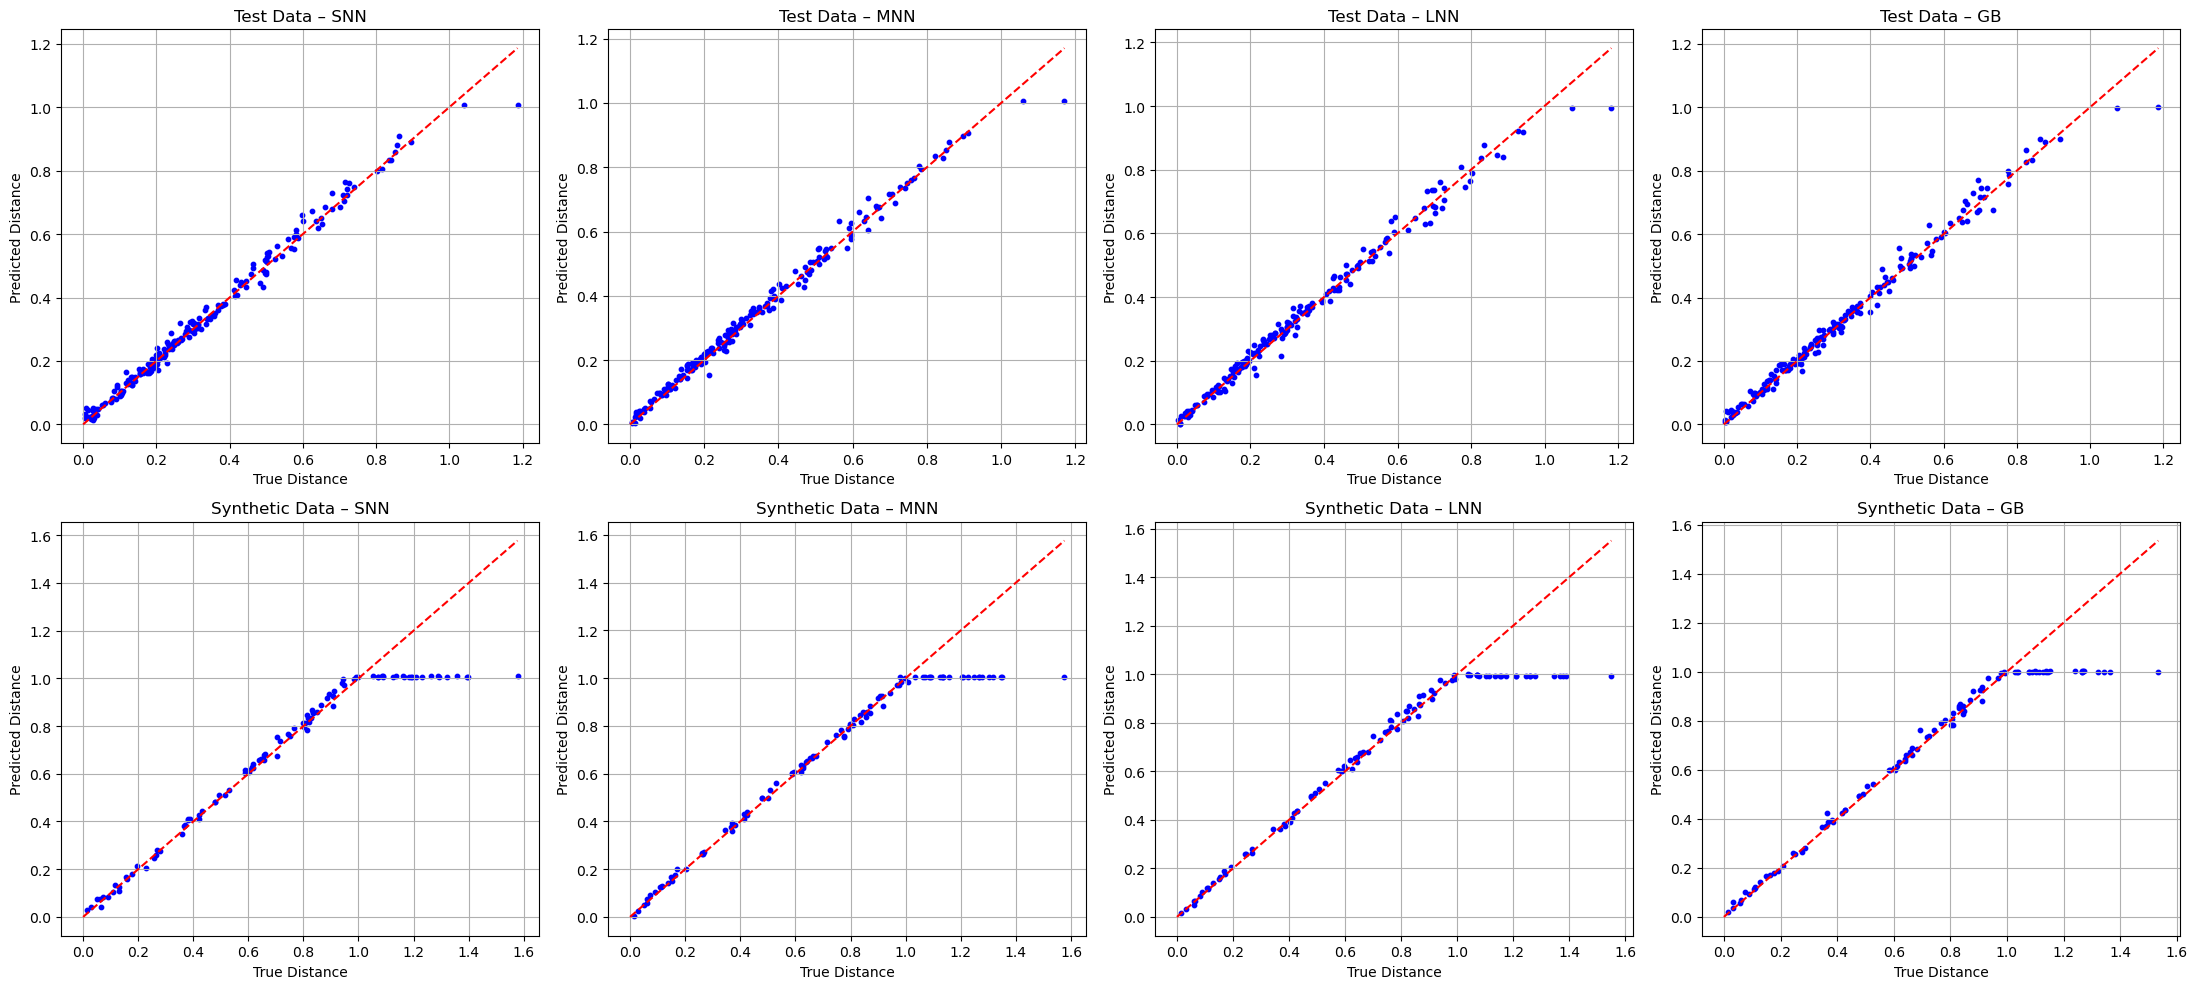


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.016253 0.001153   0.024202  0.002412
     Test Data   MNN  0.015889 0.002130   0.023760  0.002211
     Test Data   LNN  0.016606 0.001627   0.024528  0.002549
     Test Data    GB  0.015999 0.001210   0.024980  0.001449
Synthetic Data   SNN  0.058904 0.002081   0.118334  0.001343
Synthetic Data   MNN  0.058400 0.002572   0.117512  0.003107
Synthetic Data   LNN  0.059890 0.002068   0.120553  0.003674
Synthetic Data    GB  0.057527 0.002644   0.115147  0.003632


In [5]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS1_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier

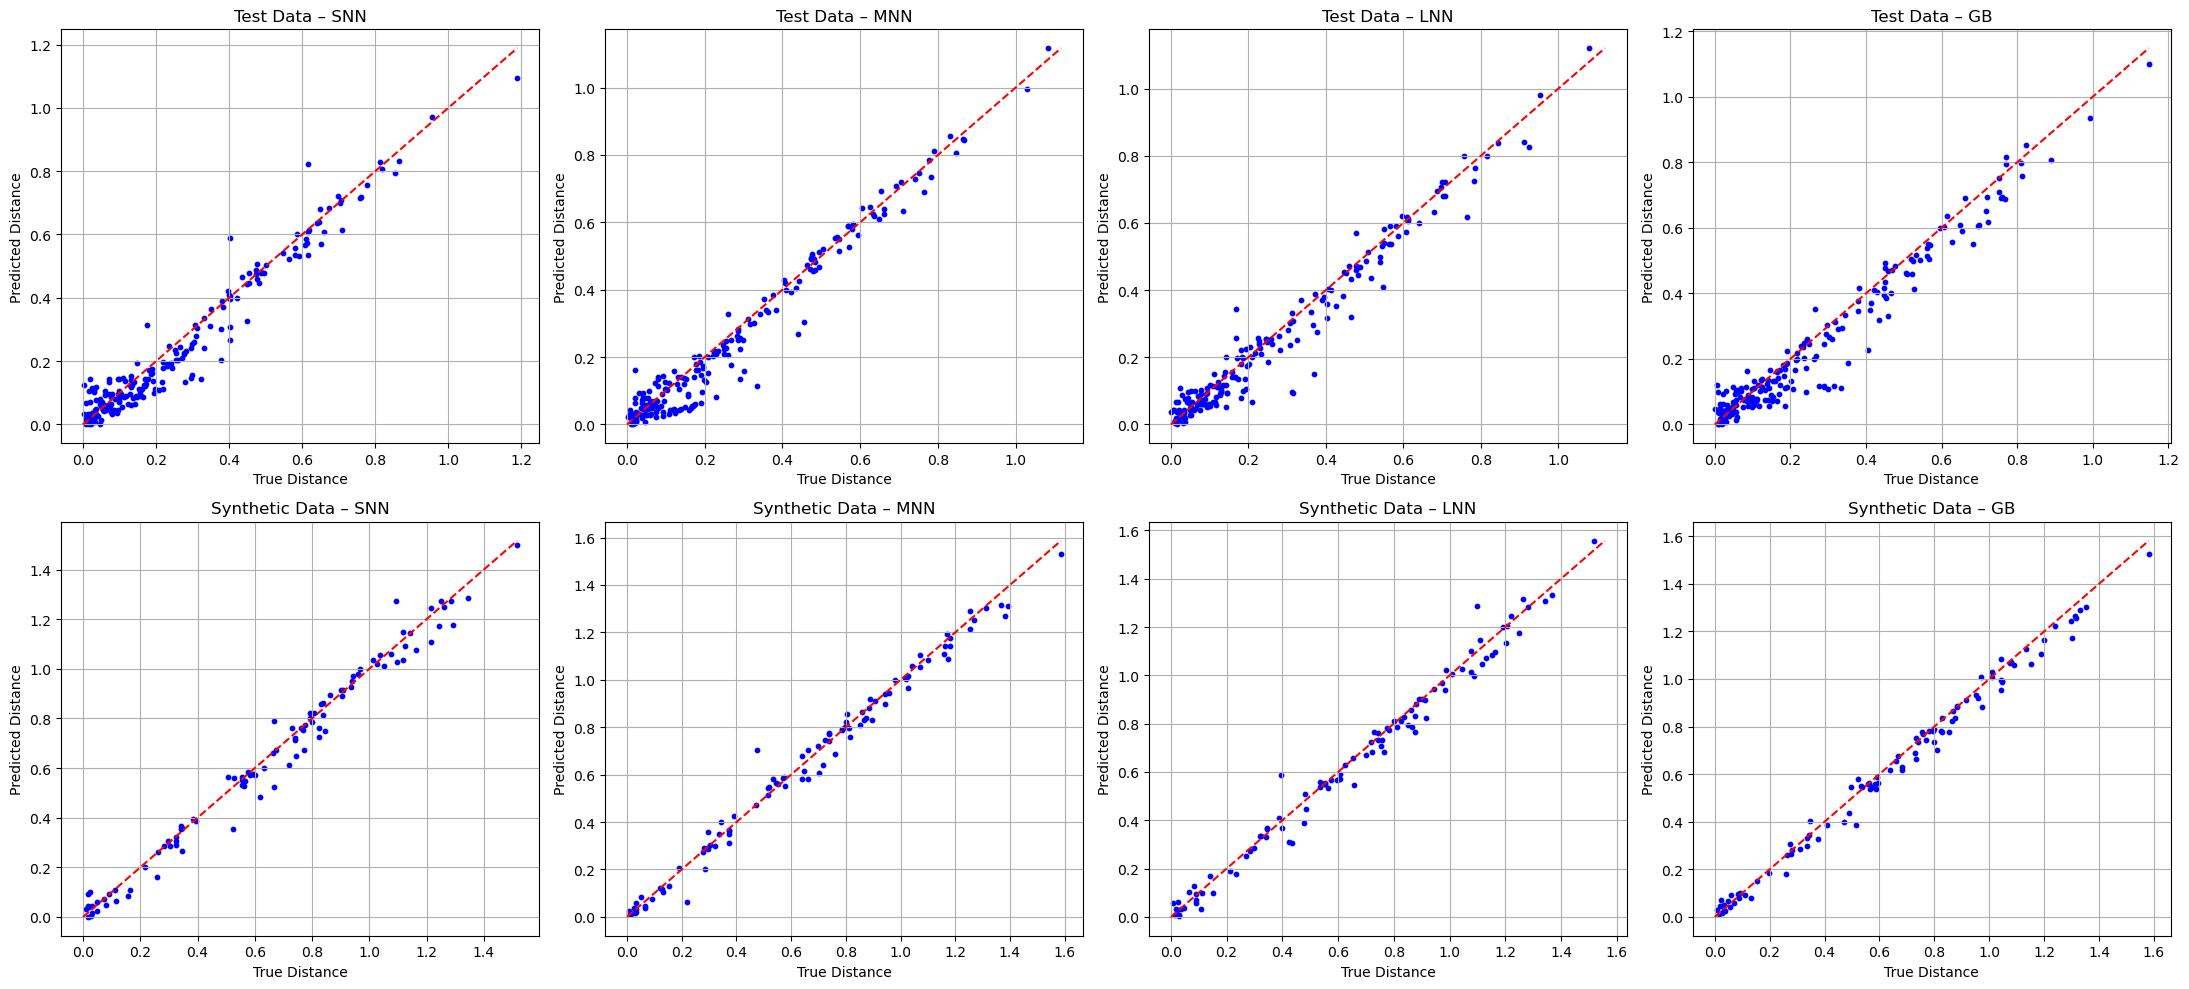


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.042752 0.003098   0.058362  0.004025
     Test Data   MNN  0.039107 0.002508   0.054251  0.002783
     Test Data   LNN  0.037482 0.003289   0.053957  0.005224
     Test Data    GB  0.040144 0.001444   0.058809  0.003739
Synthetic Data   SNN  0.039990 0.002508   0.055453  0.004229
Synthetic Data   MNN  0.036975 0.003533   0.052573  0.005285
Synthetic Data   LNN  0.042767 0.009651   0.058503  0.009613
Synthetic Data    GB  0.036634 0.004239   0.050686  0.006898


In [6]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS1_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

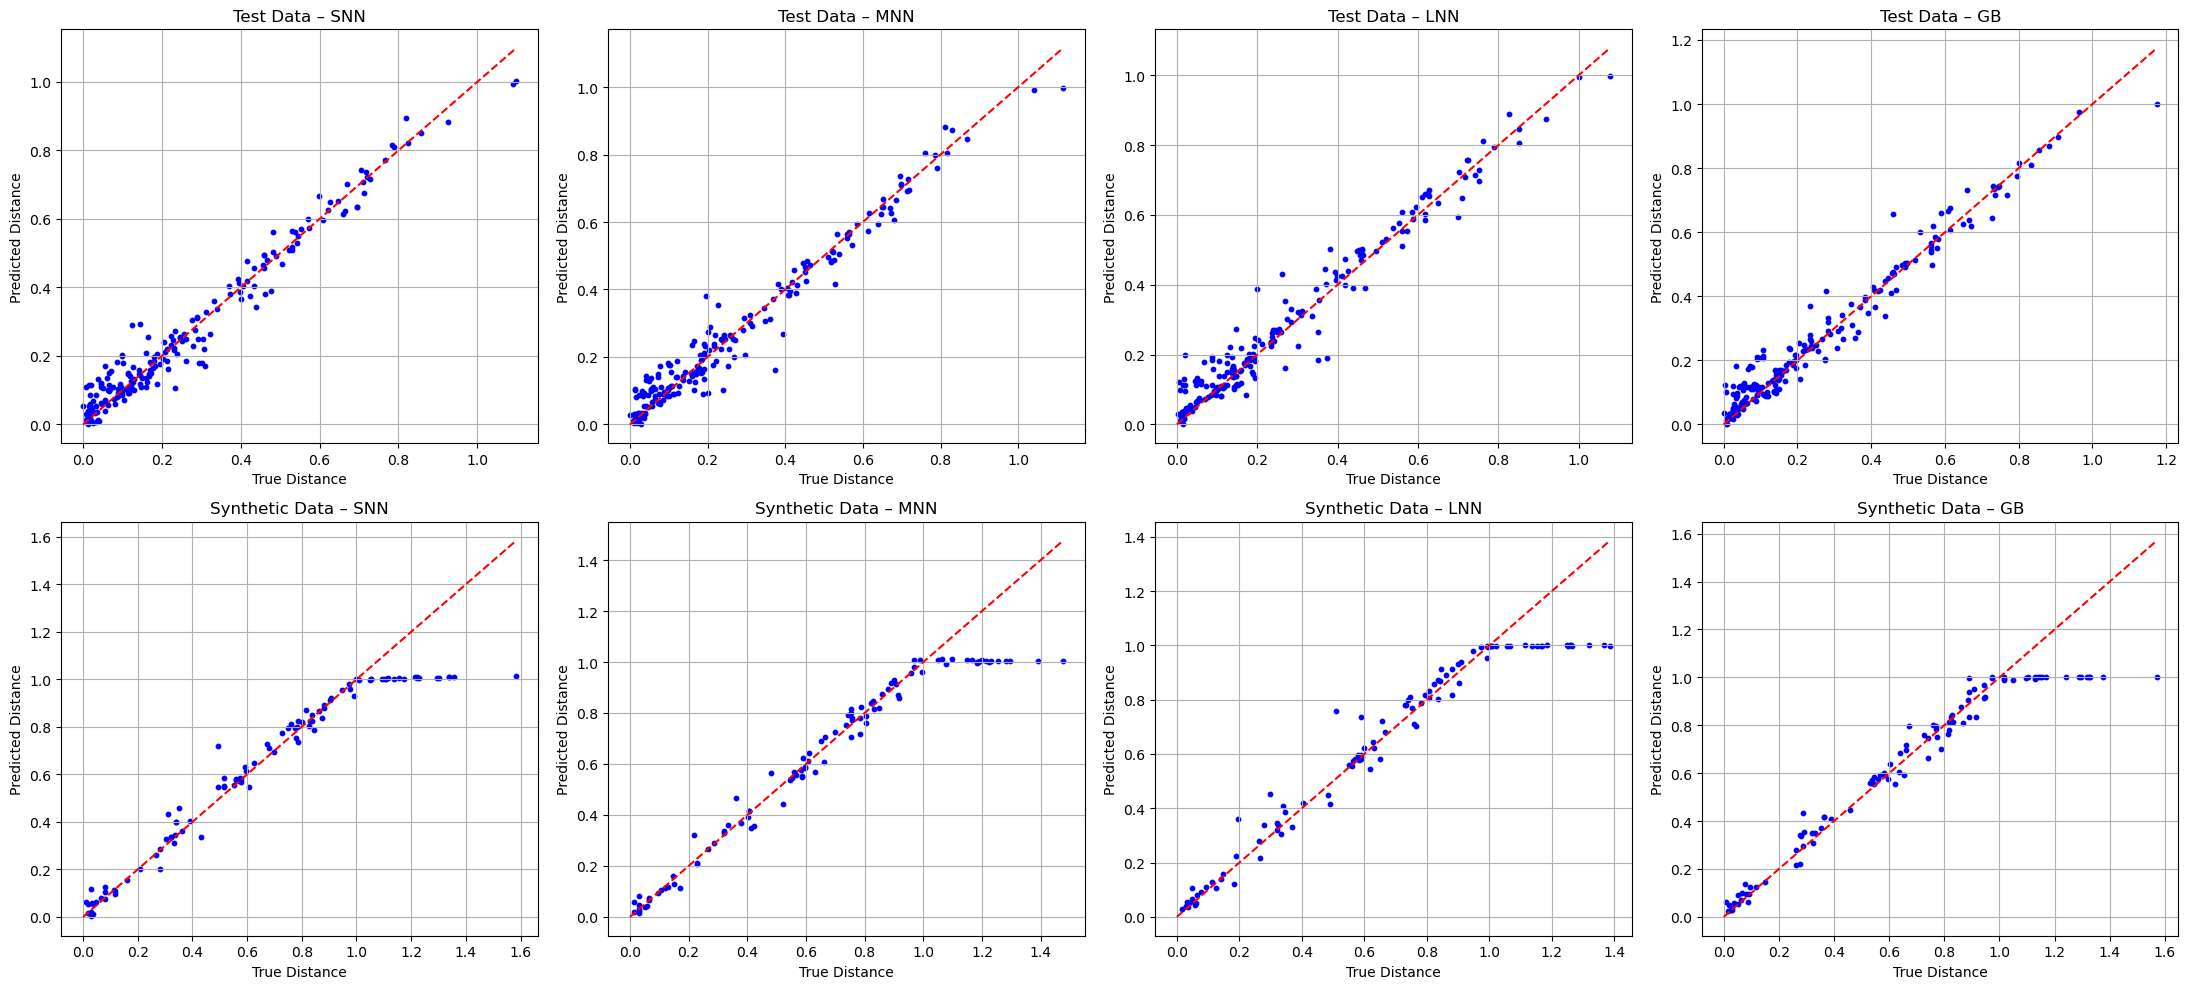


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.035901 0.001846   0.049803  0.002854
     Test Data   MNN  0.033593 0.001020   0.049236  0.002666
     Test Data   LNN  0.035196 0.001657   0.051127  0.002691
     Test Data    GB  0.035335 0.001773   0.051093  0.003413
Synthetic Data   SNN  0.062387 0.004849   0.109828  0.007124
Synthetic Data   MNN  0.062437 0.003391   0.110751  0.005361
Synthetic Data   LNN  0.061392 0.003572   0.108284  0.004661
Synthetic Data    GB  0.065051 0.003043   0.115272  0.004518


In [7]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS1_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier

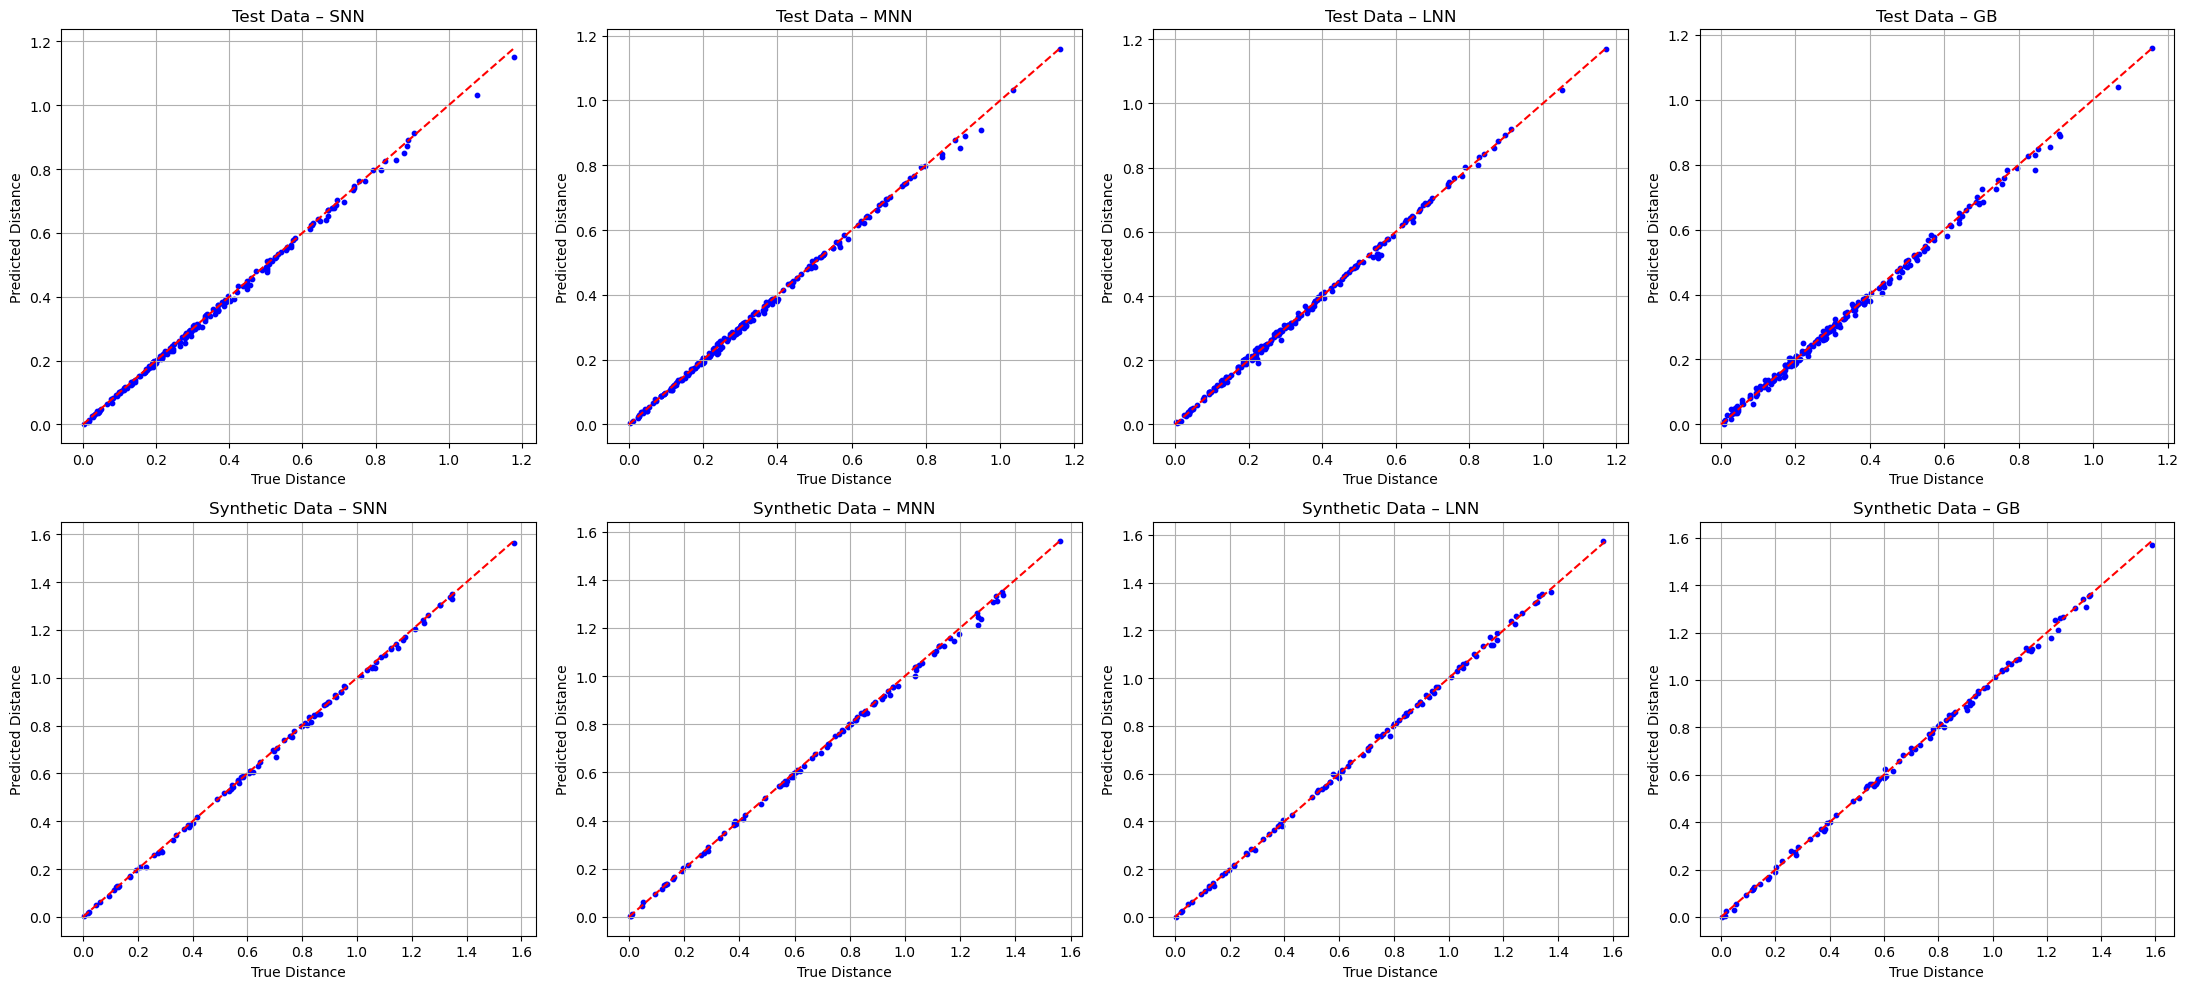


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.006223 0.000914   0.008603  0.001119
     Test Data   MNN  0.005666 0.001750   0.007825  0.002357
     Test Data   LNN  0.008389 0.004847   0.011597  0.005444
     Test Data    GB  0.009662 0.000583   0.012741  0.000894
Synthetic Data   SNN  0.006610 0.000704   0.009354  0.001229
Synthetic Data   MNN  0.007917 0.002817   0.011549  0.002862
Synthetic Data   LNN  0.008885 0.002616   0.012554  0.003652
Synthetic Data    GB  0.009461 0.000972   0.012421  0.001372


In [8]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS1_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

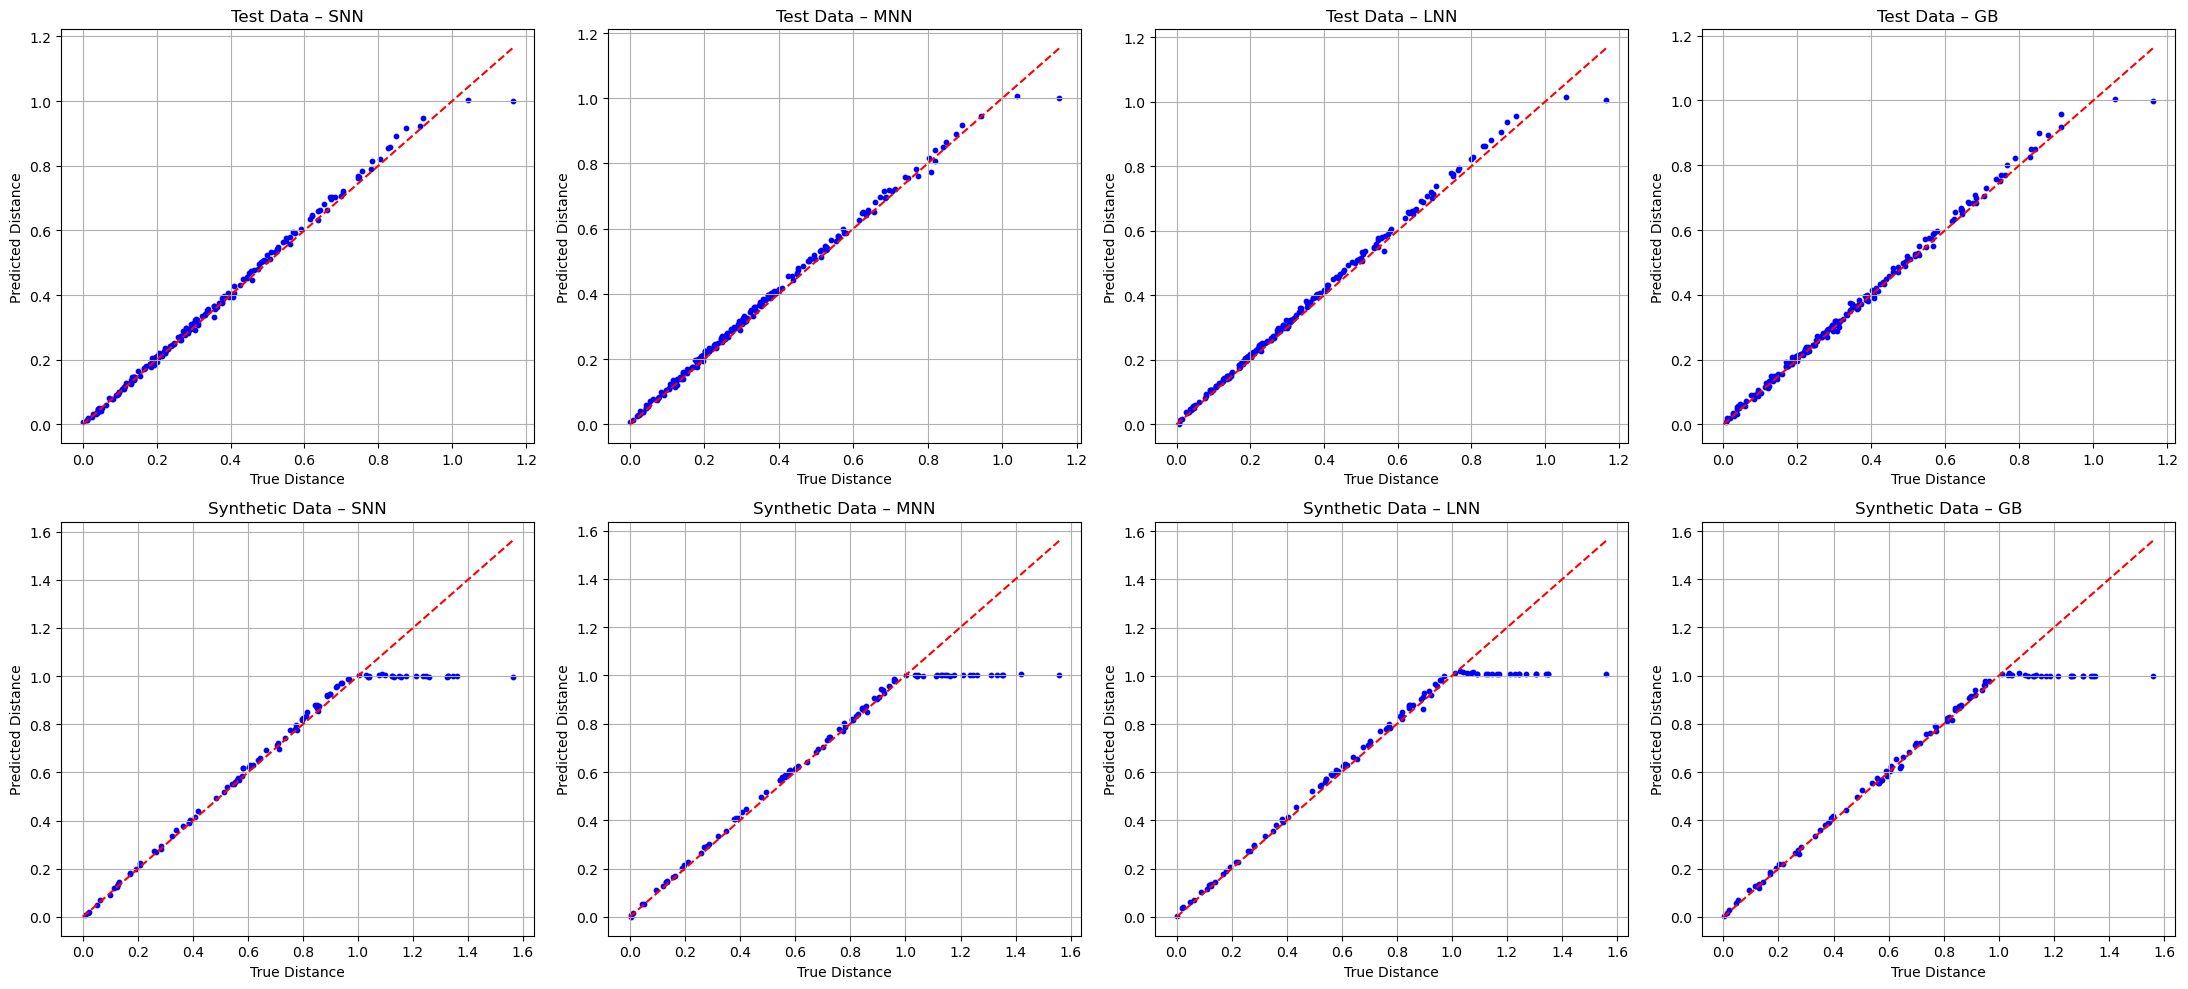


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.010775 0.000383   0.017151  0.000788
     Test Data   MNN  0.013102 0.001399   0.018085  0.001528
     Test Data   LNN  0.013497 0.001791   0.018413  0.001428
     Test Data    GB  0.011787 0.000867   0.017764  0.000779
Synthetic Data   SNN  0.053334 0.002566   0.111108  0.004668
Synthetic Data   MNN  0.054344 0.001949   0.112154  0.002600
Synthetic Data   LNN  0.054058 0.002737   0.110568  0.003121
Synthetic Data    GB  0.053352 0.003059   0.110111  0.004885


In [9]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS1_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

## Two spirals dataset

In [10]:
# Import dataset
data_train = np.load("../data/Synth_dataset_2_train.npz")
X_train = data_train["X"]
y_train = data_train["y"]

data_test = np.load("../data/Synth_dataset_2_test.npz")
X_test = data_test["X"]
y_test = data_test["y"]

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 2))

### Black box 1: Random Forest classifier

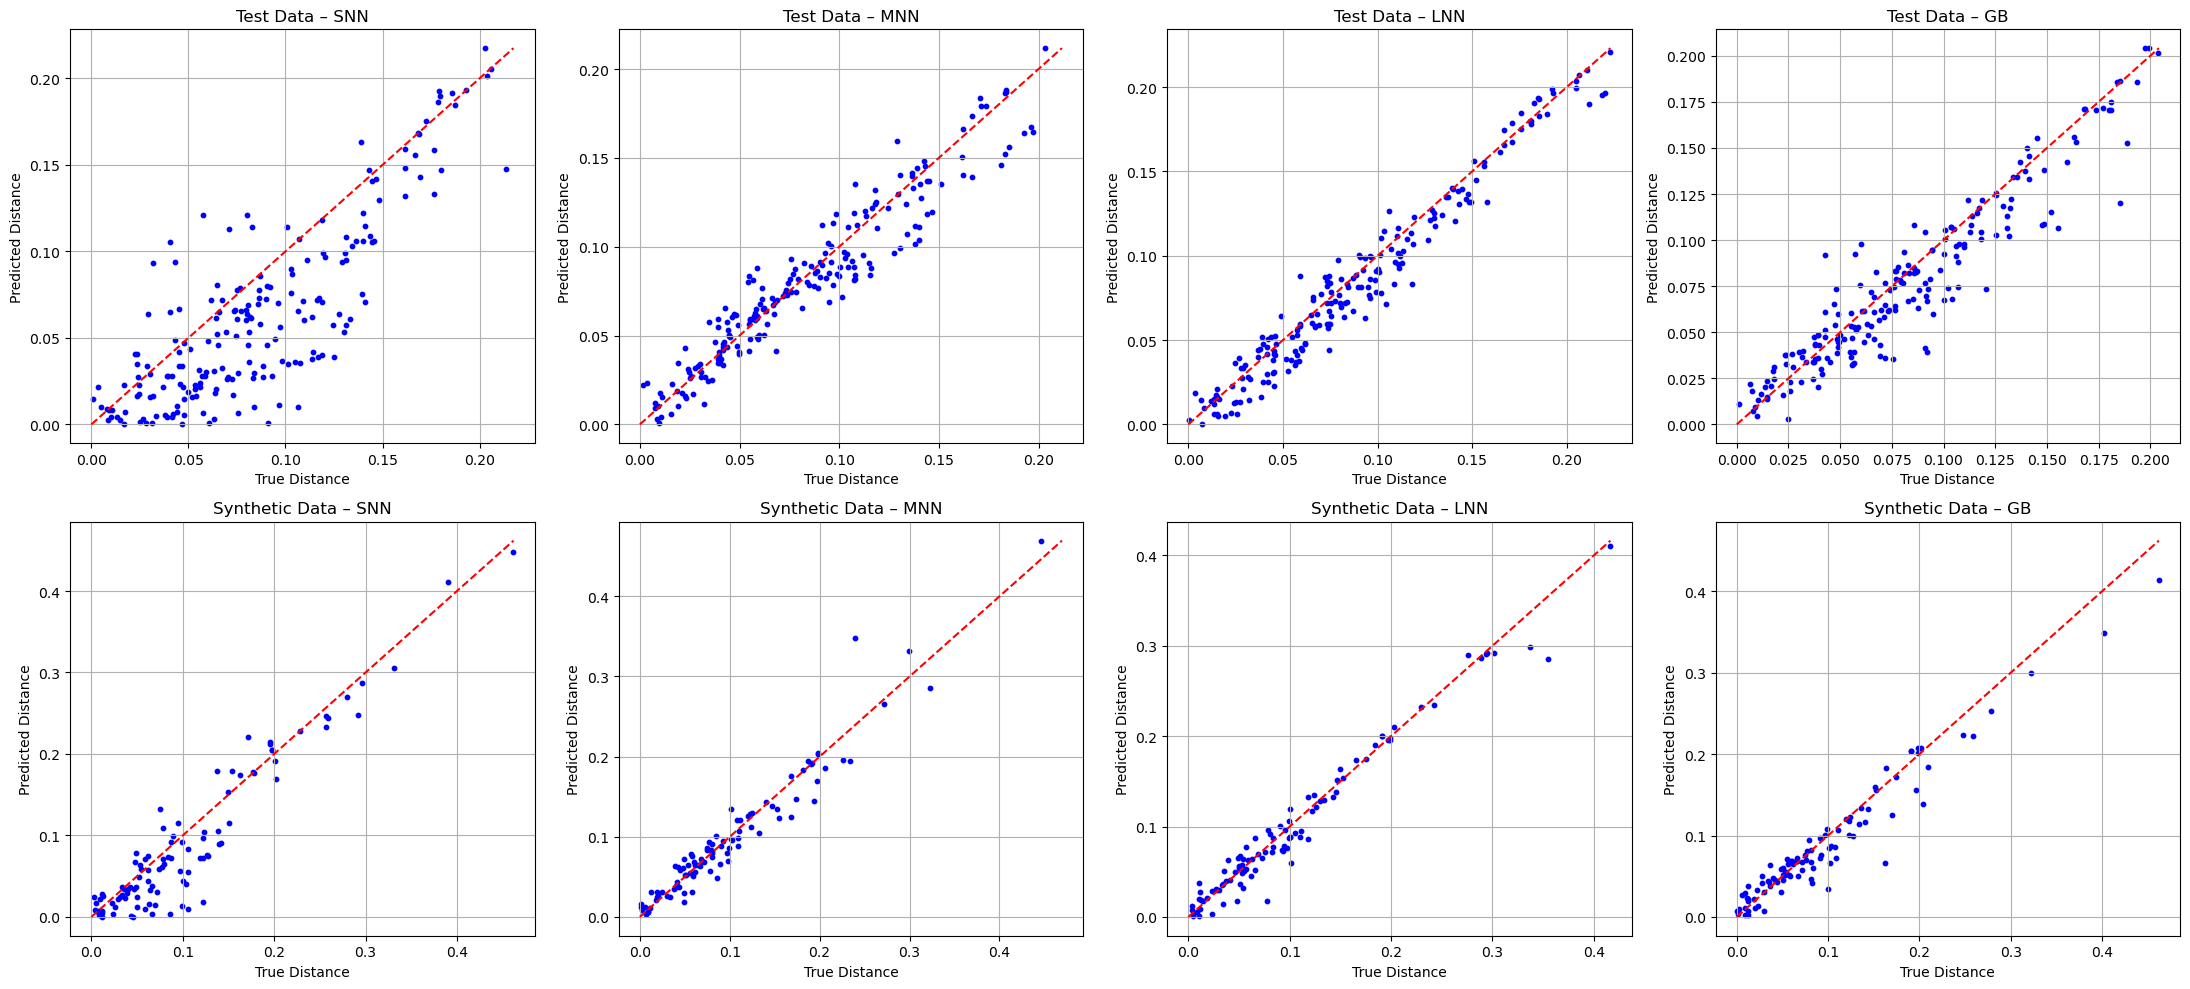


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.027259 0.003847   0.035365  0.005358
     Test Data   MNN  0.011190 0.001992   0.014996  0.002937
     Test Data   LNN  0.011516 0.001059   0.014391  0.001357
     Test Data    GB  0.011337 0.000444   0.015582  0.000794
Synthetic Data   SNN  0.024360 0.002459   0.033065  0.003102
Synthetic Data   MNN  0.012126 0.002976   0.016706  0.005095
Synthetic Data   LNN  0.011279 0.000760   0.015162  0.001382
Synthetic Data    GB  0.012574 0.001754   0.017929  0.002714


In [11]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS2_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

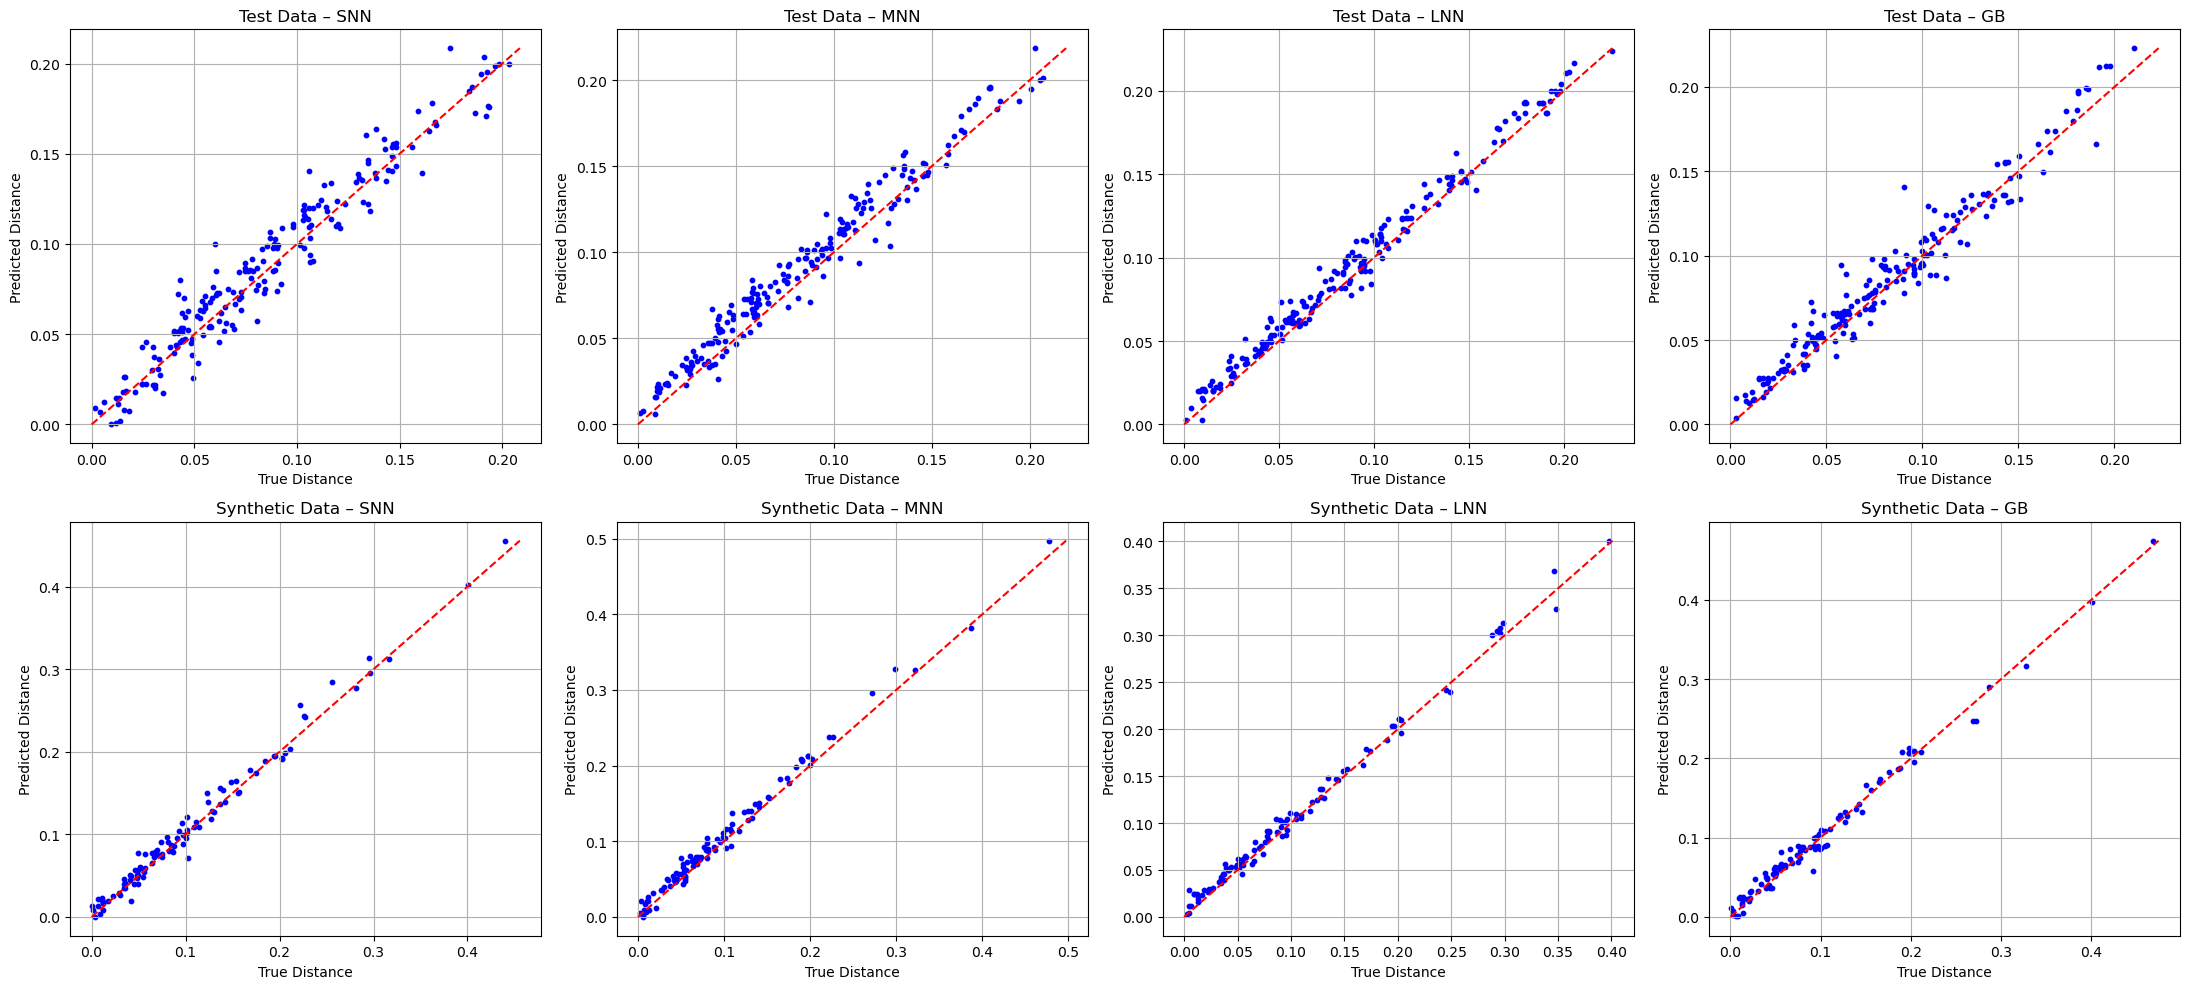


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.009037 0.000698   0.011261  0.000957
     Test Data   MNN  0.008314 0.001075   0.010514  0.001180
     Test Data   LNN  0.007256 0.000645   0.008494  0.000592
     Test Data    GB  0.007660 0.000479   0.009617  0.000841
Synthetic Data   SNN  0.009192 0.001018   0.011922  0.000967
Synthetic Data   MNN  0.008493 0.001115   0.011454  0.002477
Synthetic Data   LNN  0.007338 0.000630   0.009199  0.000763
Synthetic Data    GB  0.007999 0.000290   0.010182  0.000371


In [12]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS2_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier

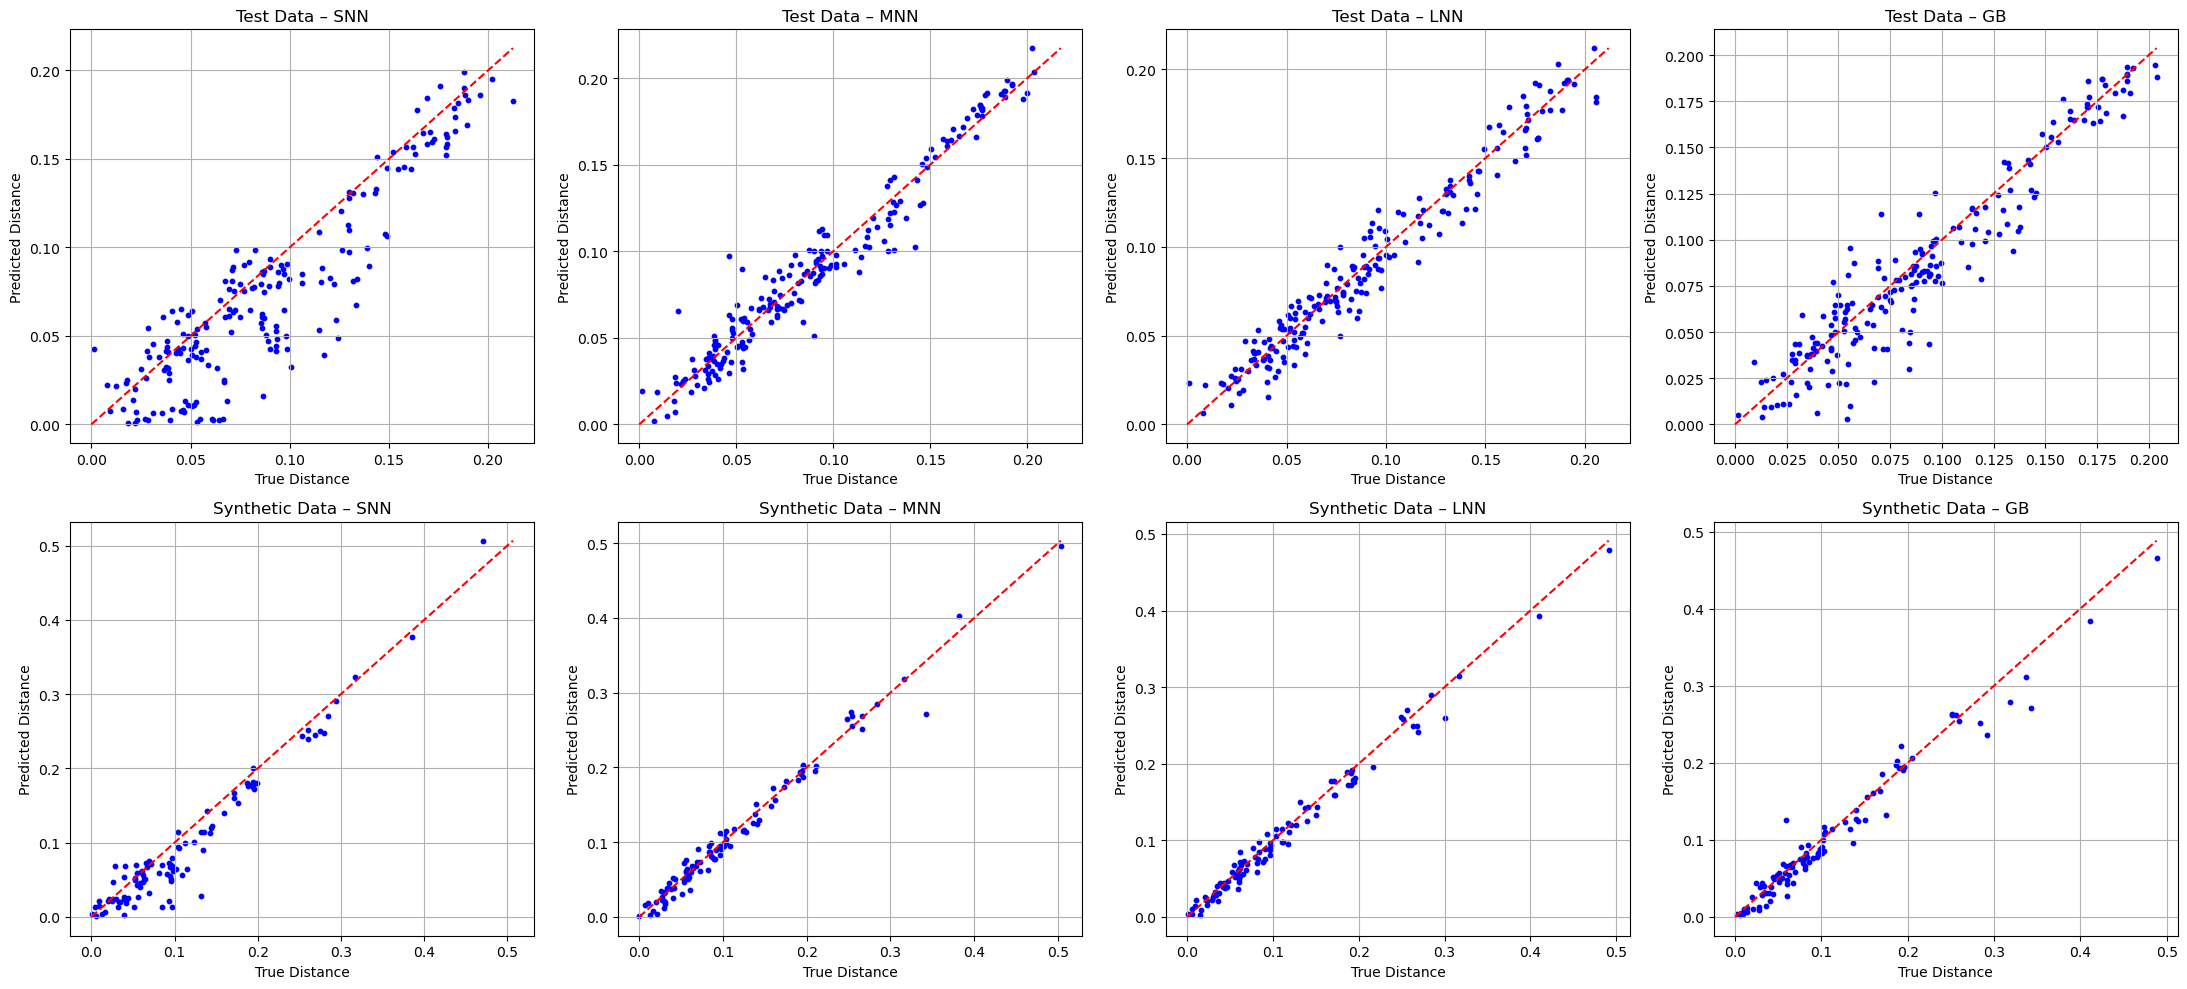


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.018837 0.003196   0.025410  0.004415
     Test Data   MNN  0.009841 0.001346   0.012887  0.001204
     Test Data   LNN  0.009855 0.000874   0.012508  0.001480
     Test Data    GB  0.011827 0.000701   0.016158  0.000736
Synthetic Data   SNN  0.018753 0.002692   0.026435  0.003394
Synthetic Data   MNN  0.009769 0.002250   0.012838  0.002400
Synthetic Data   LNN  0.010306 0.000905   0.013352  0.001149
Synthetic Data    GB  0.012079 0.000868   0.016510  0.001445


In [13]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS2_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

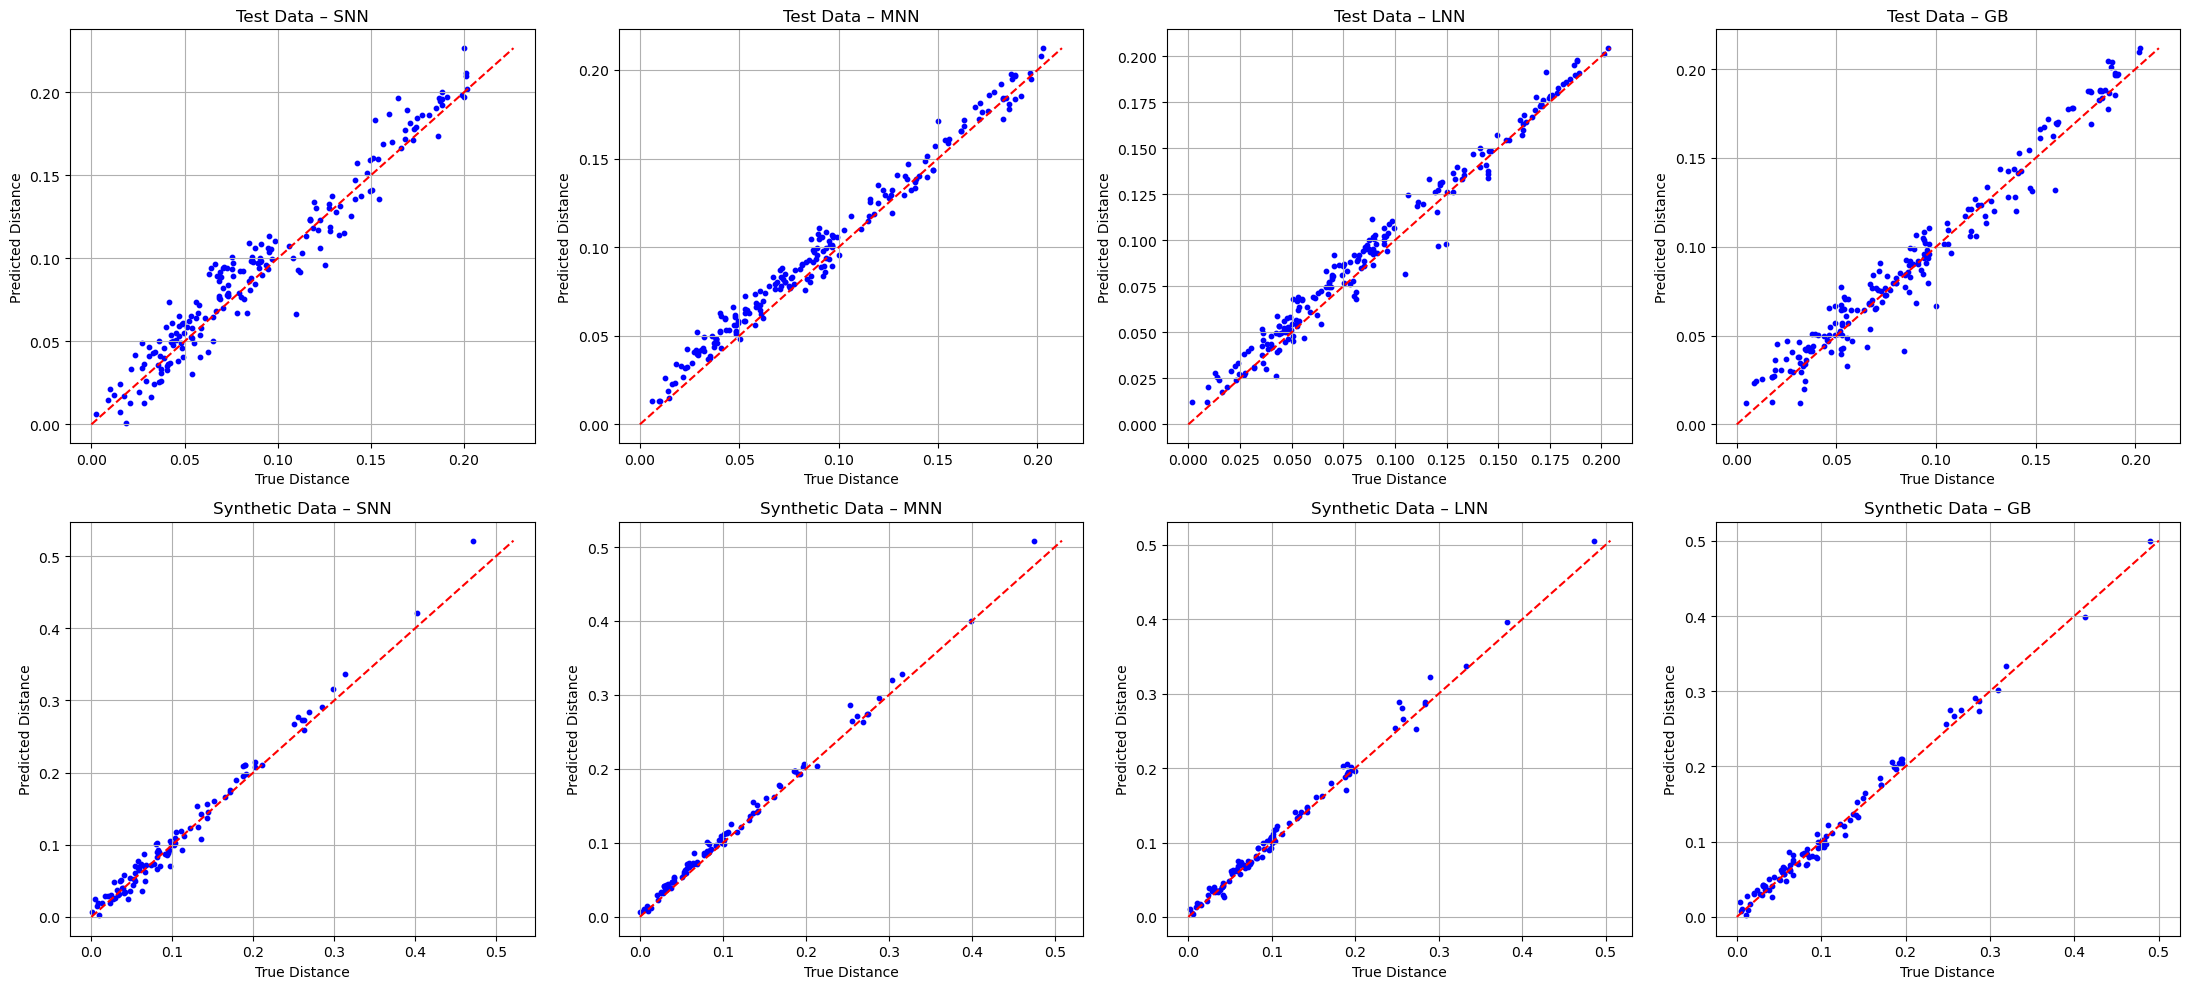


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.009666 0.001030   0.012145  0.001254
     Test Data   MNN  0.007287 0.000475   0.008871  0.000366
     Test Data   LNN  0.007855 0.001063   0.009434  0.001196
     Test Data    GB  0.008733 0.000311   0.011084  0.000351
Synthetic Data   SNN  0.009089 0.001015   0.011583  0.001266
Synthetic Data   MNN  0.007561 0.000393   0.009597  0.000202
Synthetic Data   LNN  0.008534 0.000957   0.010724  0.000890
Synthetic Data    GB  0.008199 0.000489   0.010227  0.000700


In [14]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS2_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier

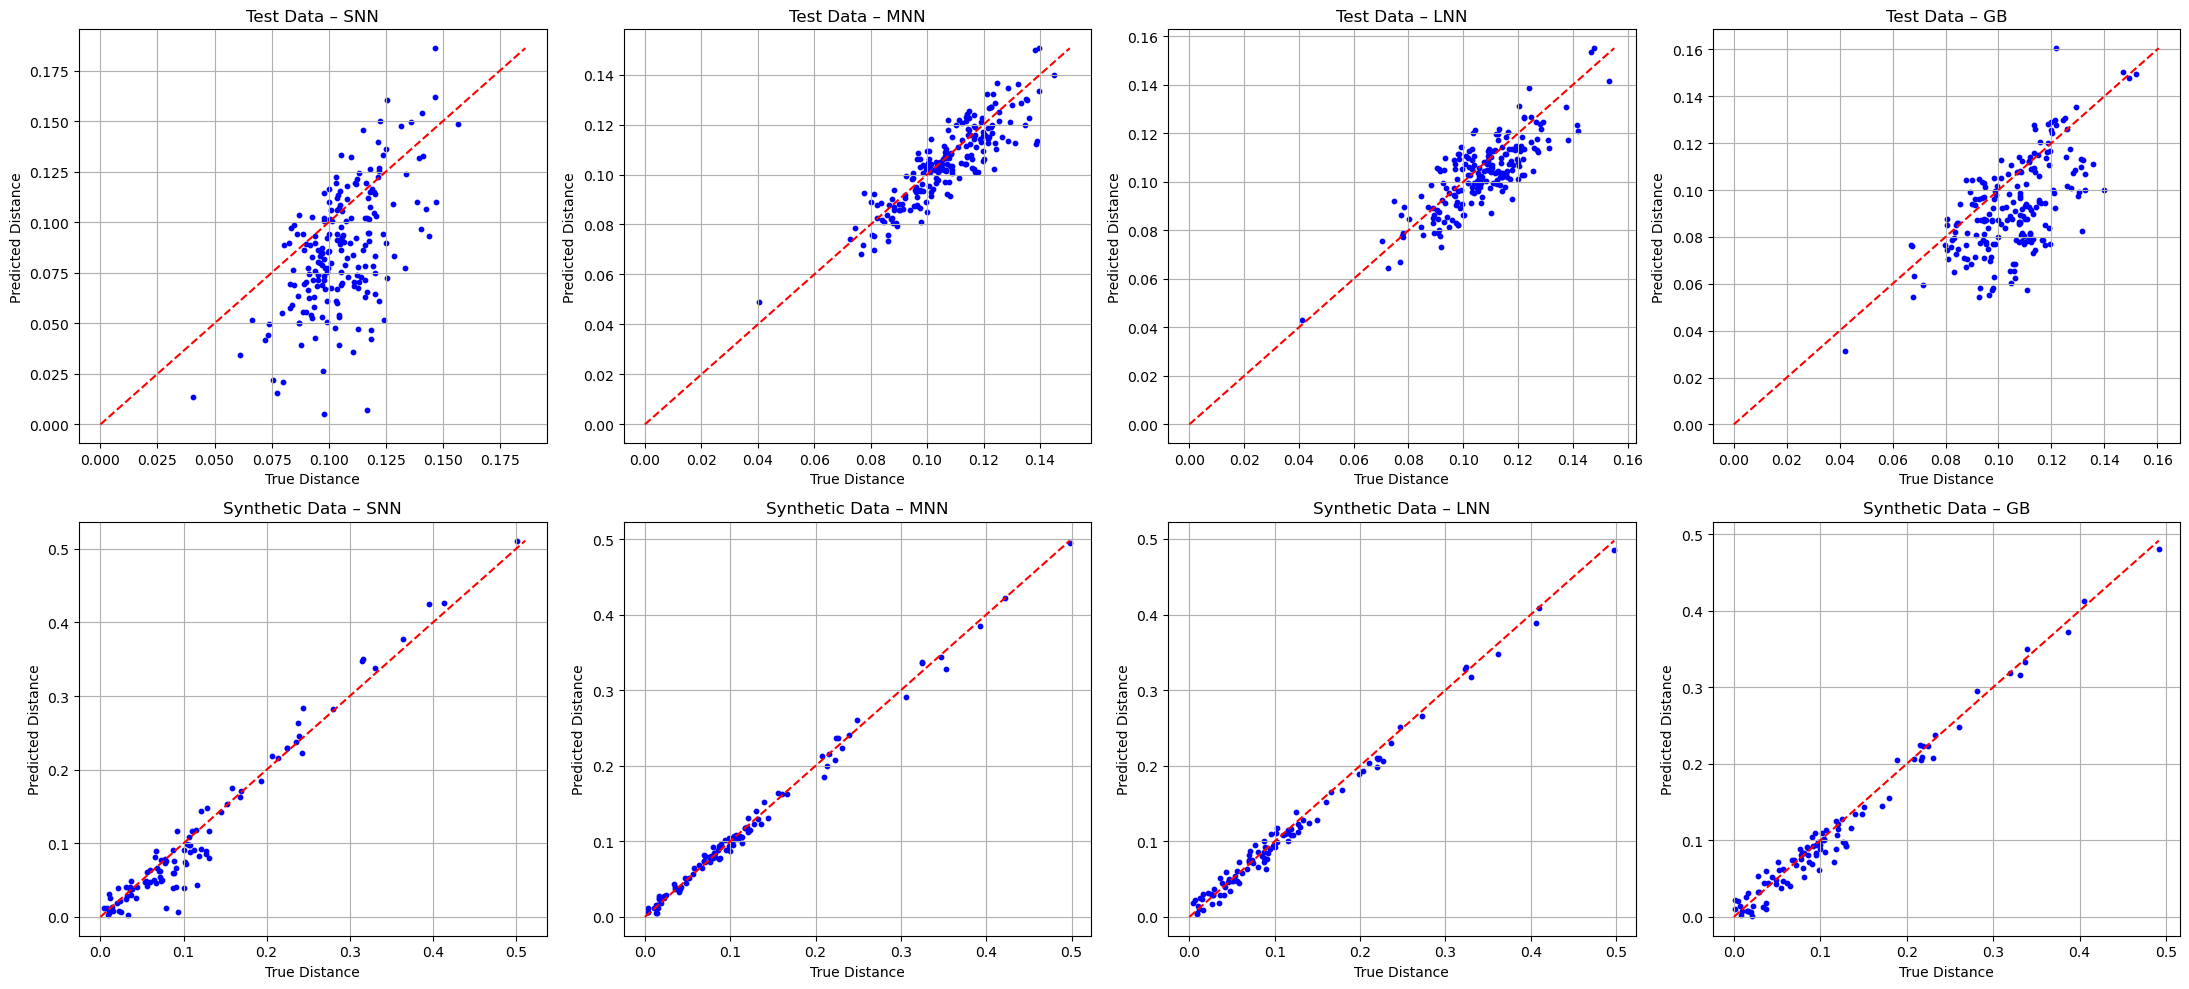


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.015944 0.004793   0.021418  0.005360
     Test Data   MNN  0.007852 0.001580   0.009747  0.001767
     Test Data   LNN  0.007134 0.001316   0.009088  0.001330
     Test Data    GB  0.017002 0.000585   0.021409  0.000589
Synthetic Data   SNN  0.011721 0.002383   0.016802  0.003479
Synthetic Data   MNN  0.007732 0.001924   0.009664  0.002162
Synthetic Data   LNN  0.007468 0.001278   0.009280  0.001373
Synthetic Data    GB  0.012079 0.000840   0.015936  0.001286


In [15]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS2_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

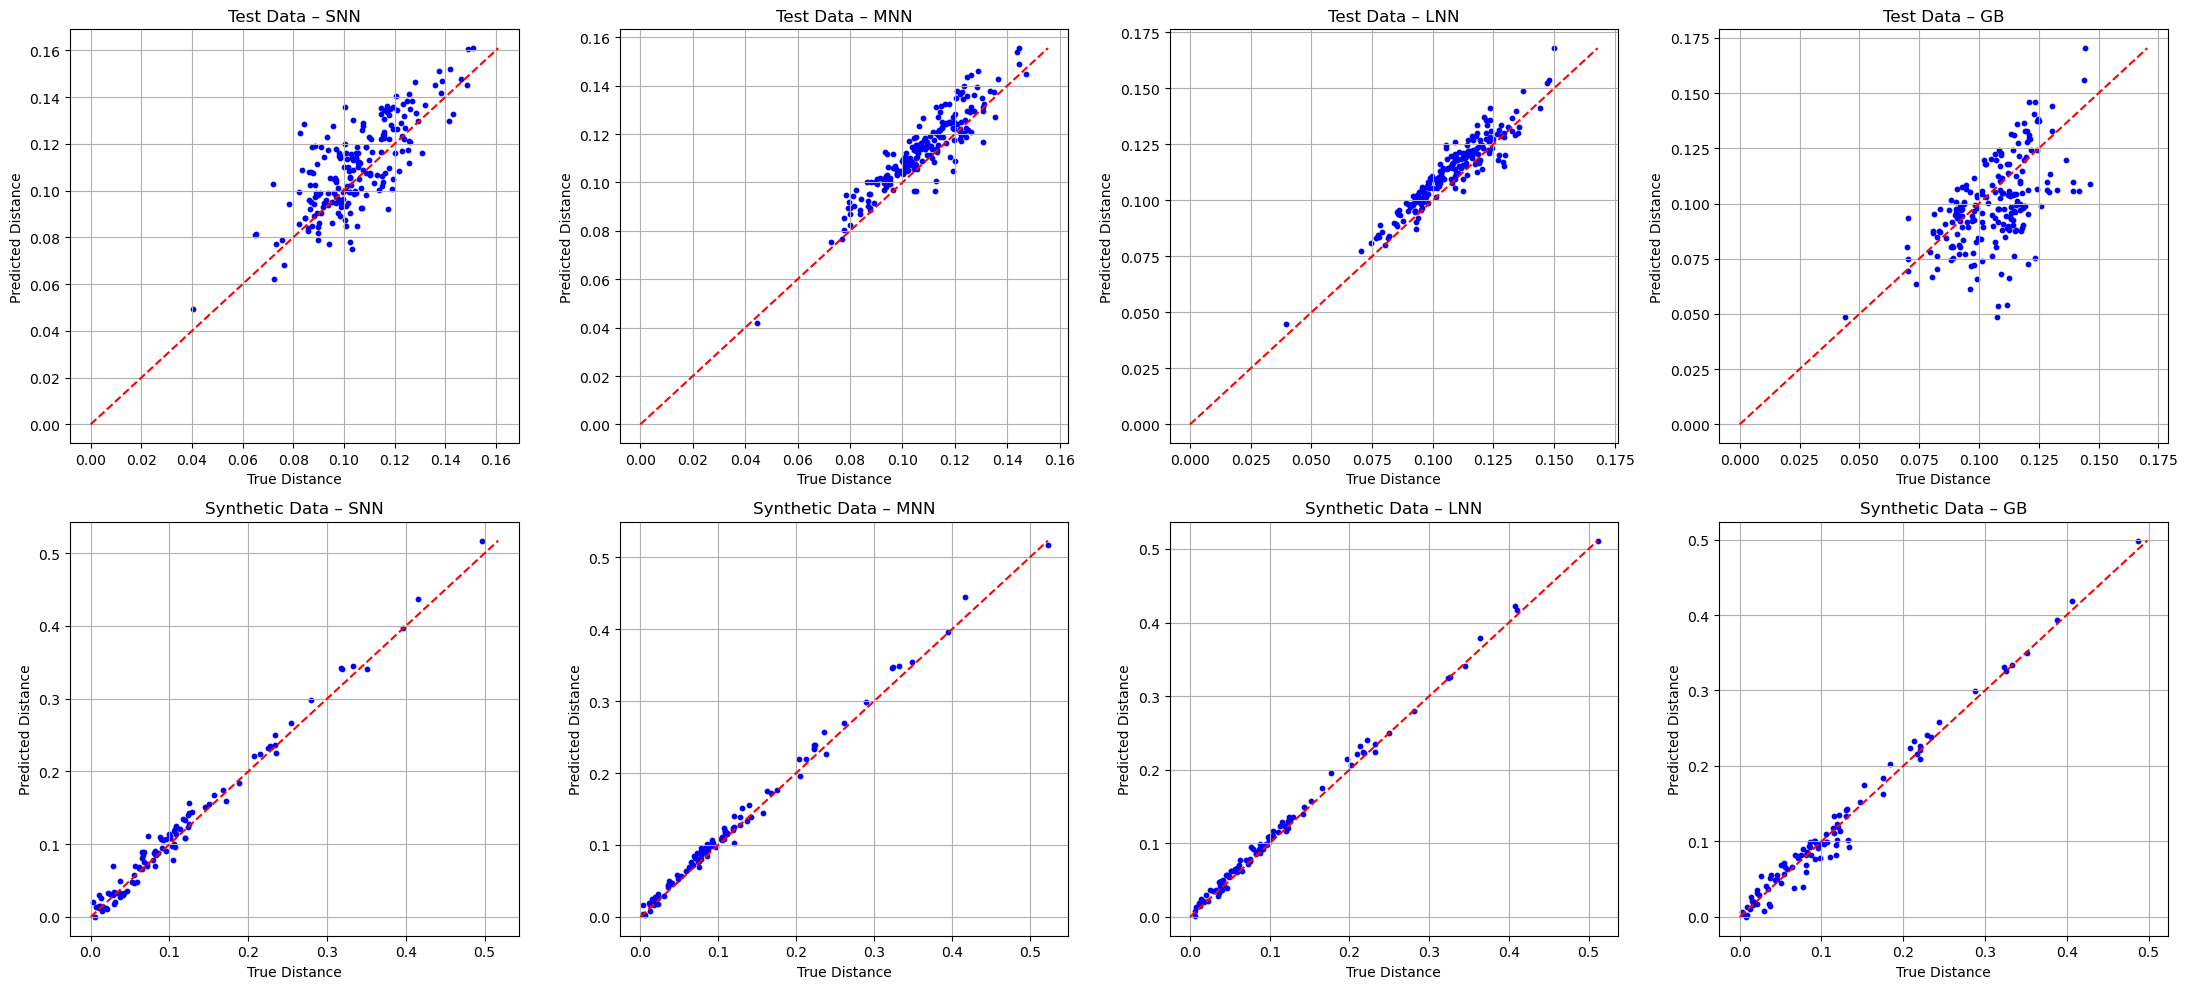


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.008650 0.001057   0.011002  0.001256
     Test Data   MNN  0.006813 0.000744   0.008075  0.000714
     Test Data   LNN  0.006977 0.000608   0.008226  0.000472
     Test Data    GB  0.013551 0.000993   0.017047  0.001158
Synthetic Data   SNN  0.008576 0.001165   0.010654  0.001297
Synthetic Data   MNN  0.007673 0.000895   0.009141  0.000913
Synthetic Data   LNN  0.006887 0.000962   0.008299  0.000906
Synthetic Data    GB  0.010322 0.000447   0.013410  0.000500


In [16]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS2_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

## Space-filling and convoluted dataset

In [3]:
# Import dataset
data_train = np.load("../data/Synth_dataset_3_train.npz")
X_train = data_train["X"]
y_train = data_train["y"]

data_test = np.load("../data/Synth_dataset_3_test.npz")
X_test = data_test["X"]
y_test = data_test["y"]

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 2))

### Black box 1: Random Forest classifier

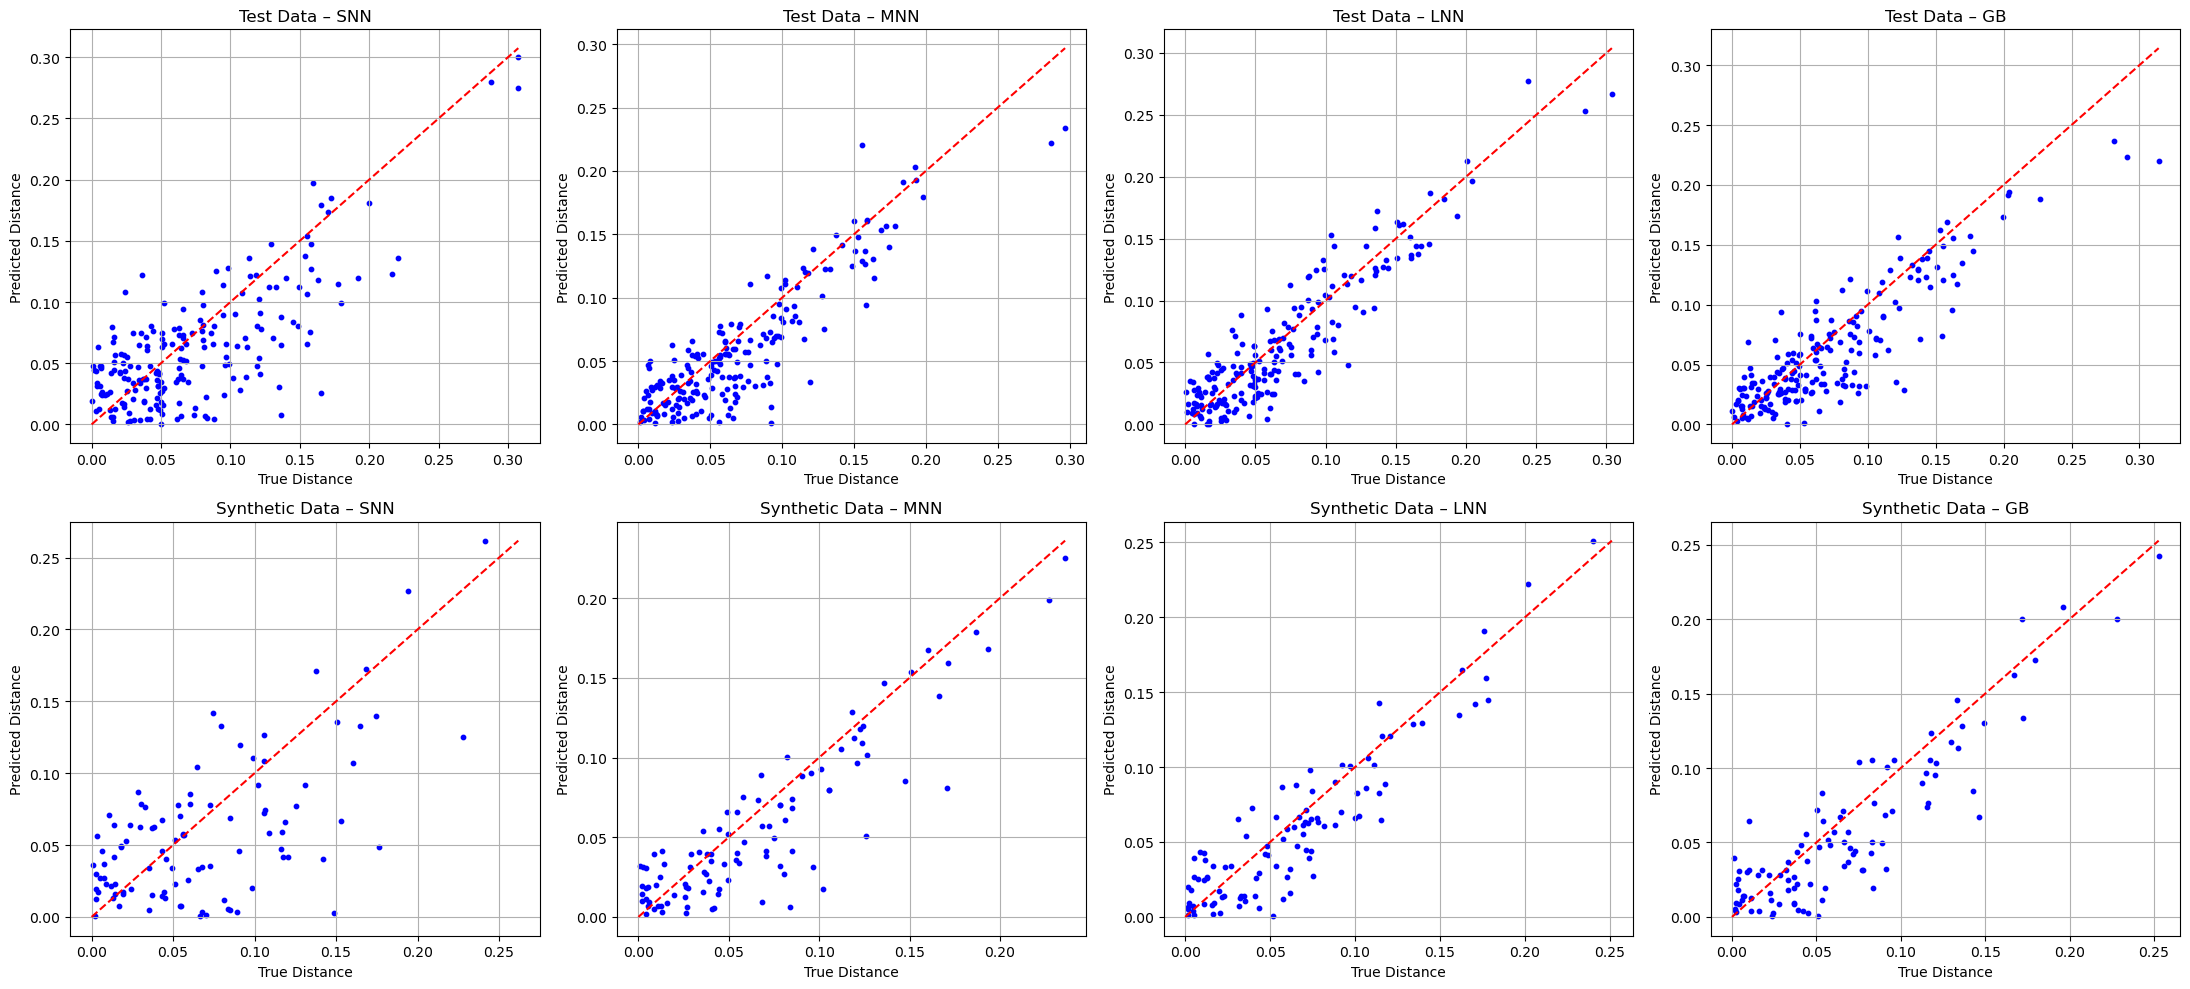


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.028386 0.001449   0.037340  0.001421
     Test Data   MNN  0.020464 0.001139   0.026964  0.001101
     Test Data   LNN  0.020319 0.002786   0.026317  0.004302
     Test Data    GB  0.021294 0.000726   0.027716  0.000814
Synthetic Data   SNN  0.030904 0.002636   0.039428  0.003548
Synthetic Data   MNN  0.019561 0.000388   0.025779  0.000654
Synthetic Data   LNN  0.019660 0.001947   0.025516  0.003652
Synthetic Data    GB  0.020427 0.001590   0.026744  0.002758


In [18]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS3_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

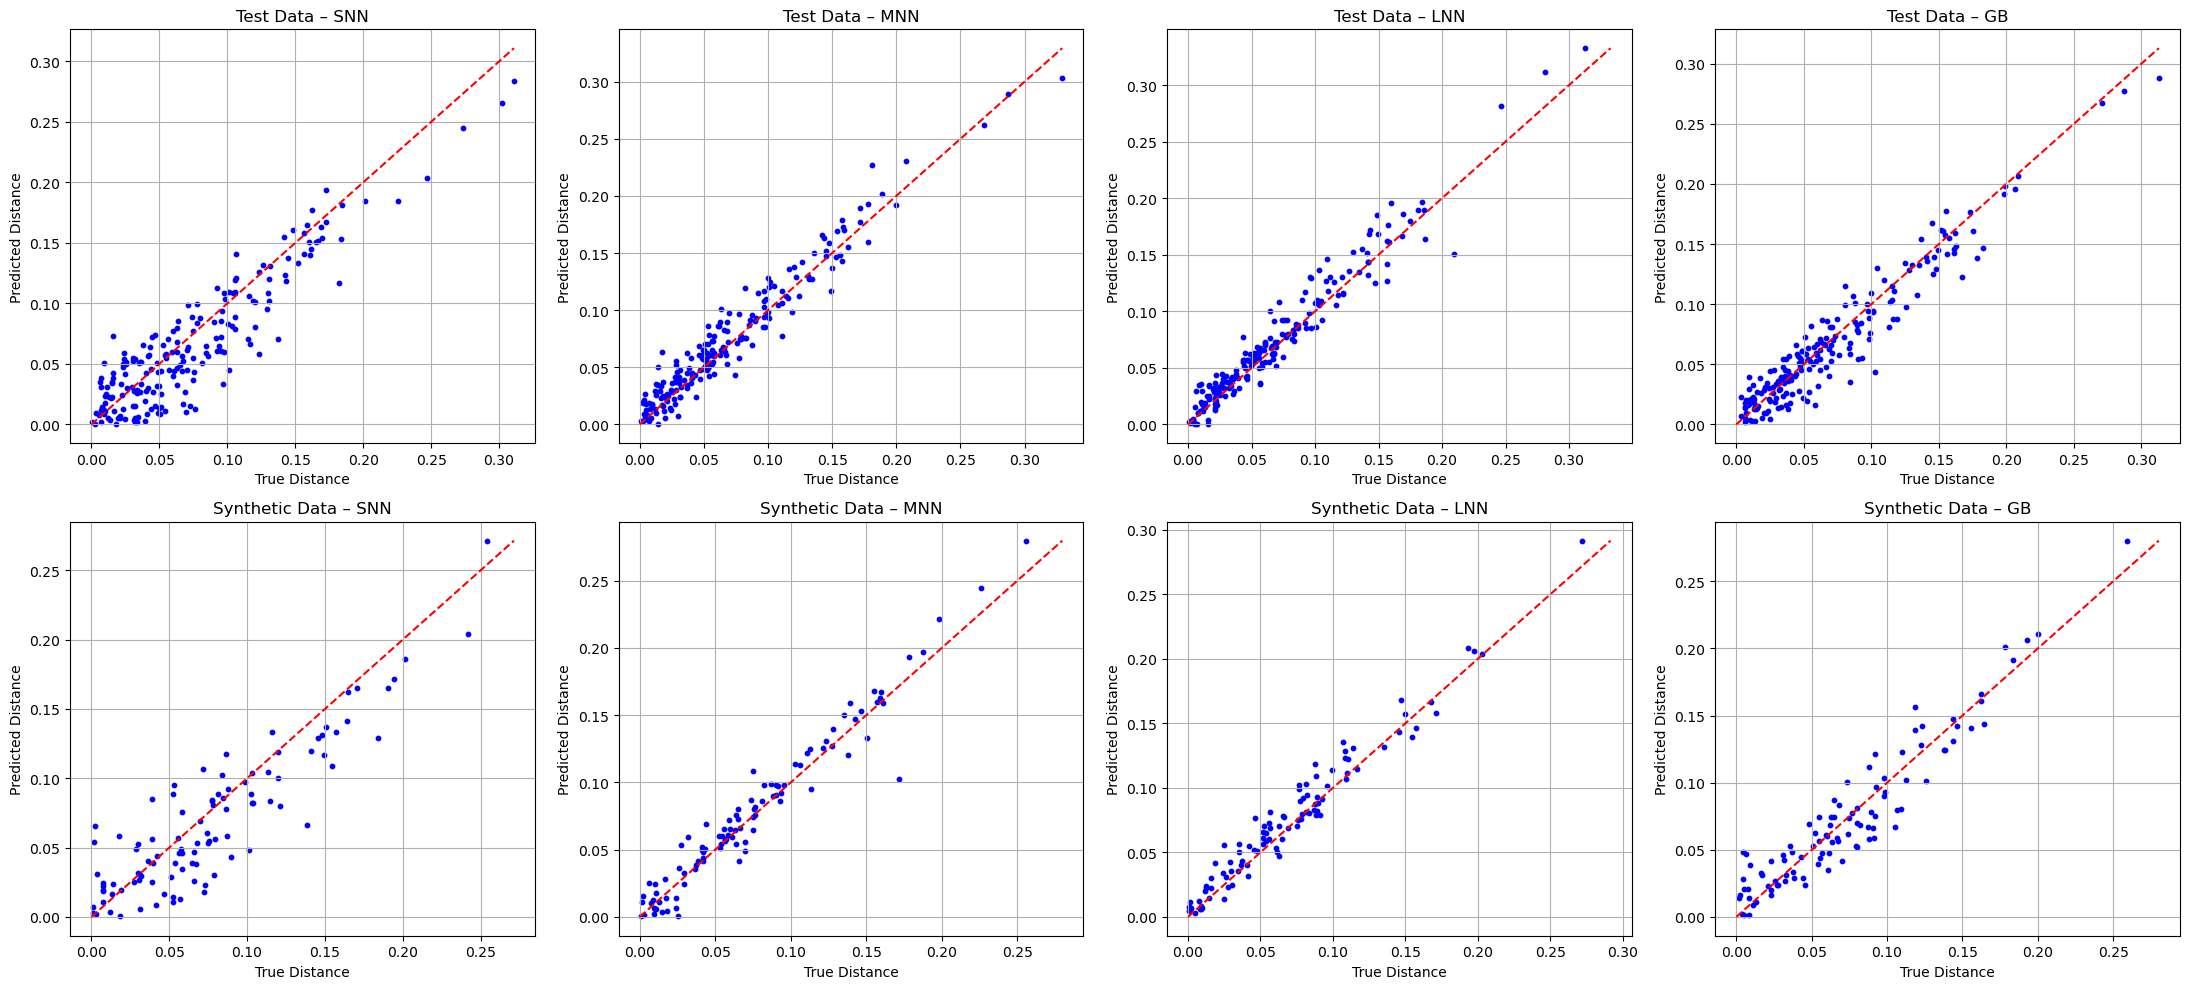


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.019012 0.001760   0.024295  0.001697
     Test Data   MNN  0.010285 0.000979   0.013432  0.001339
     Test Data   LNN  0.009723 0.000780   0.012805  0.001041
     Test Data    GB  0.012646 0.000288   0.016418  0.000259
Synthetic Data   SNN  0.019312 0.001288   0.025183  0.001415
Synthetic Data   MNN  0.010742 0.001840   0.015489  0.003527
Synthetic Data   LNN  0.009870 0.000803   0.013596  0.001741
Synthetic Data    GB  0.013626 0.001175   0.017556  0.001777


In [4]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS3_1", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier

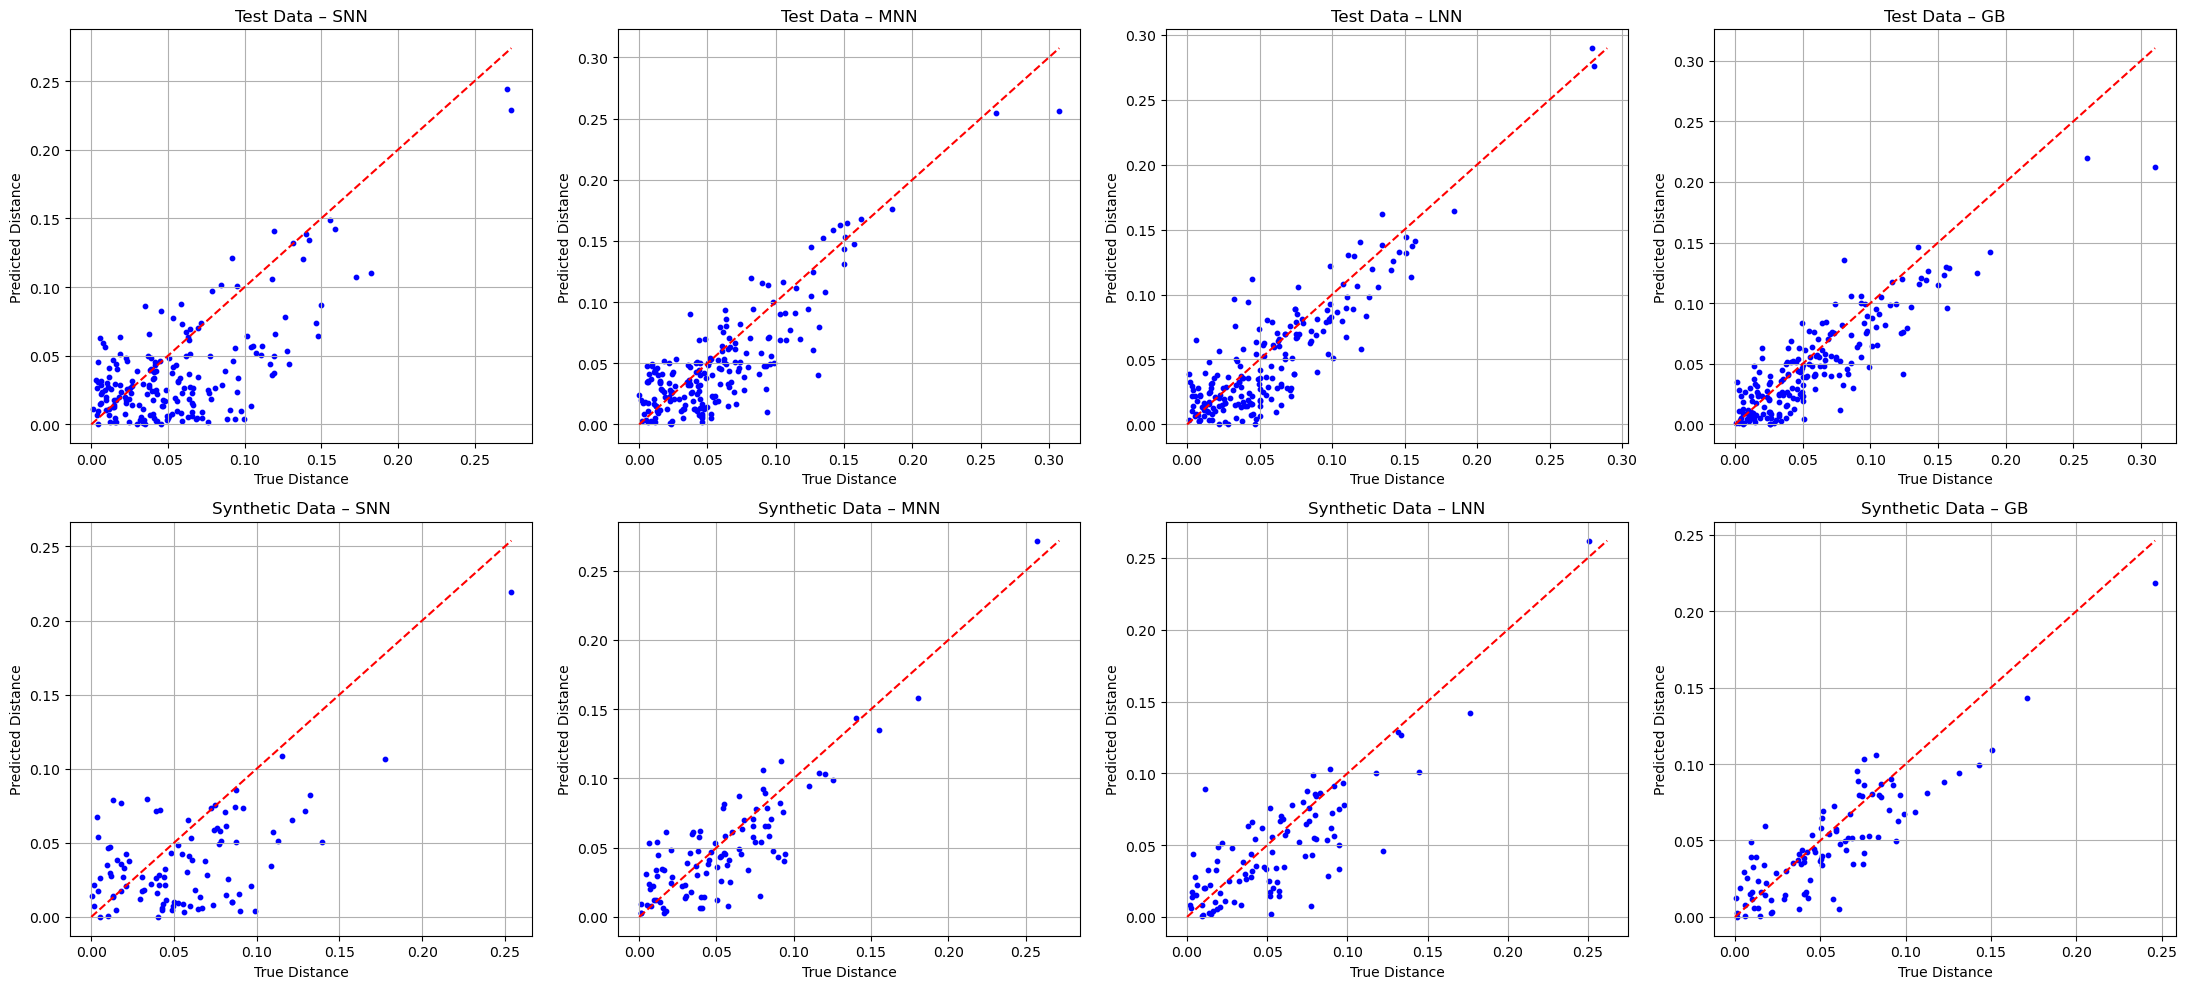


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.029052 0.000985   0.037363  0.000919
     Test Data   MNN  0.020157 0.001097   0.026026  0.001520
     Test Data   LNN  0.018245 0.000751   0.023526  0.001256
     Test Data    GB  0.017891 0.000966   0.022878  0.001292
Synthetic Data   SNN  0.030416 0.001195   0.037828  0.001179
Synthetic Data   MNN  0.019884 0.001658   0.025364  0.002002
Synthetic Data   LNN  0.018154 0.001281   0.023396  0.001526
Synthetic Data    GB  0.018225 0.000889   0.022684  0.000881


In [5]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS3_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

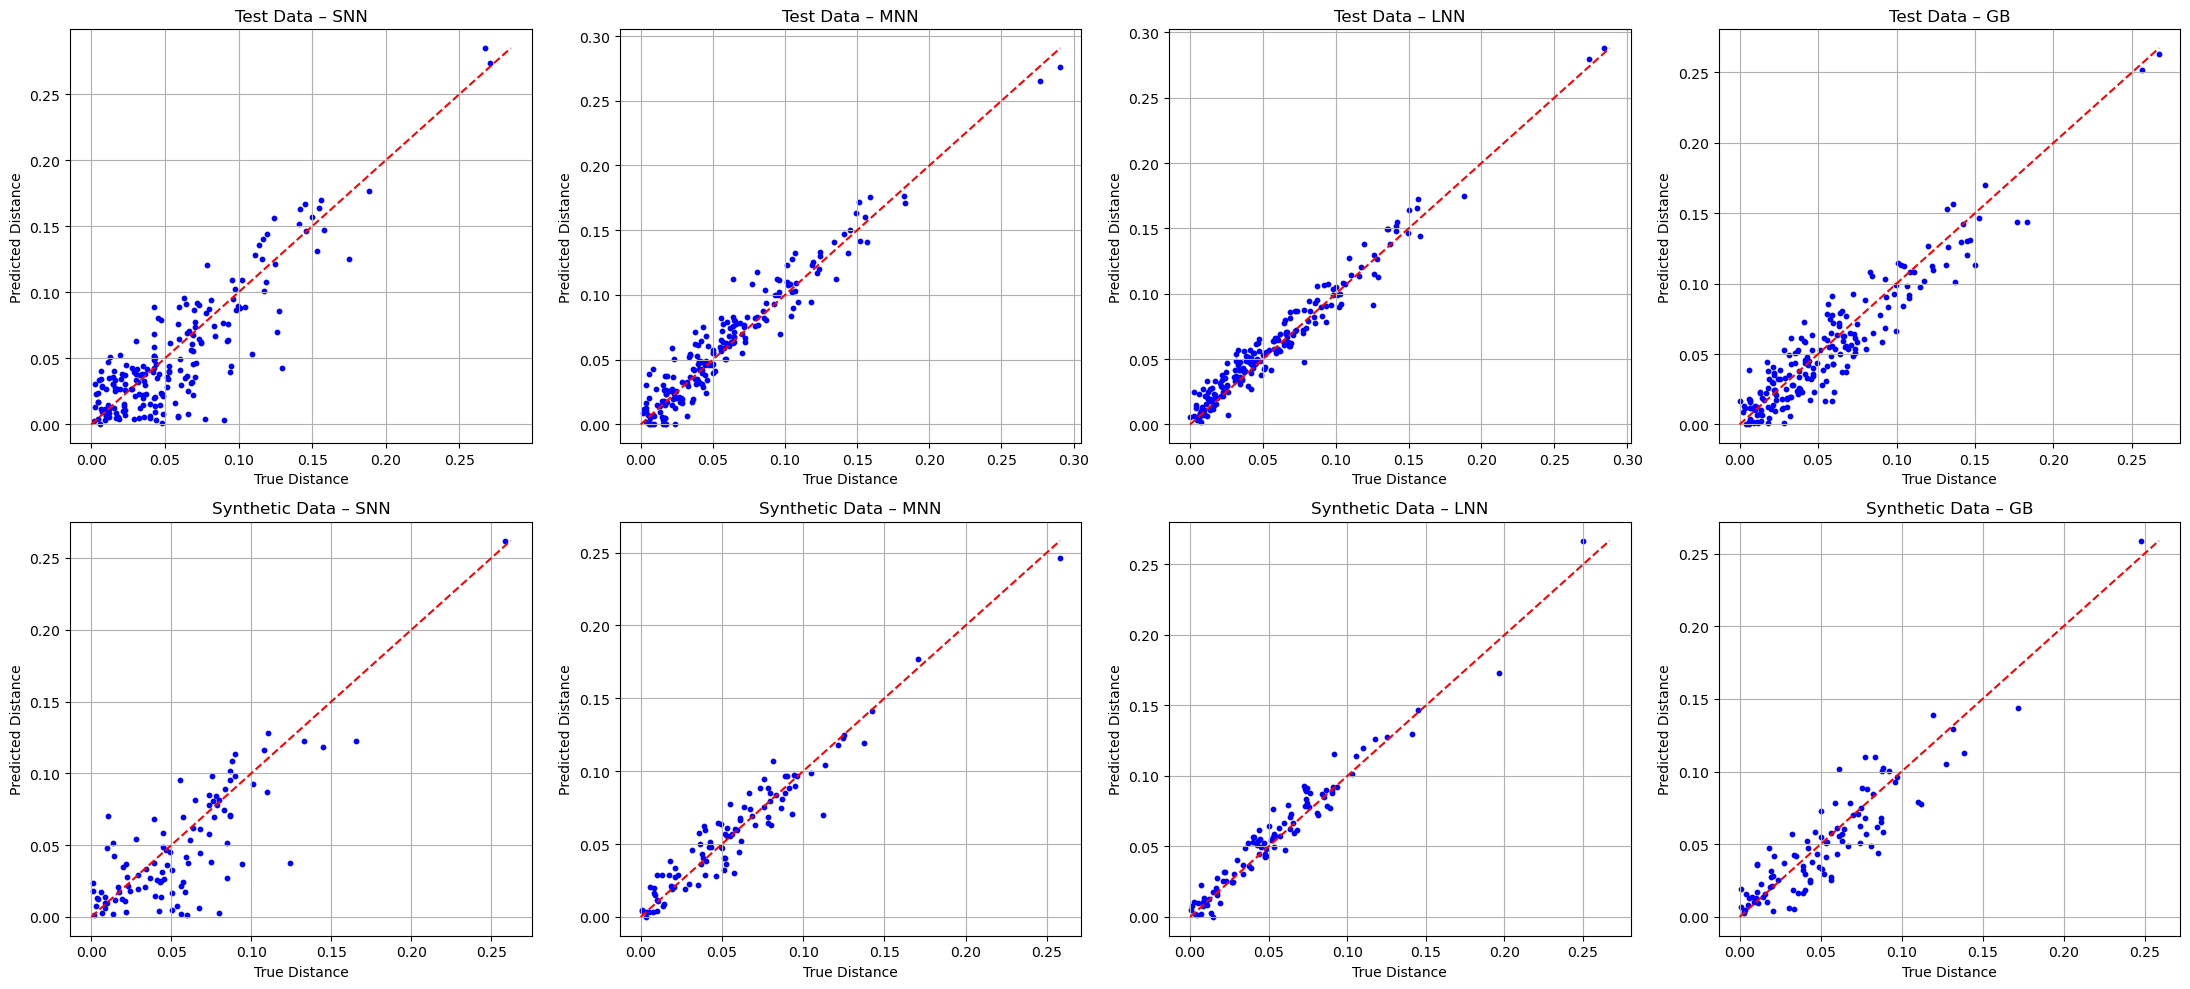


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.018668 0.000520   0.023760  0.001068
     Test Data   MNN  0.009194 0.000769   0.011873  0.001067
     Test Data   LNN  0.008018 0.000582   0.009995  0.000780
     Test Data    GB  0.013399 0.000345   0.016643  0.000486
Synthetic Data   SNN  0.018727 0.001405   0.024196  0.001690
Synthetic Data   MNN  0.008294 0.000316   0.010831  0.000524
Synthetic Data   LNN  0.007413 0.000409   0.009313  0.000621
Synthetic Data    GB  0.014116 0.000523   0.017698  0.000457


In [6]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS3_2", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier

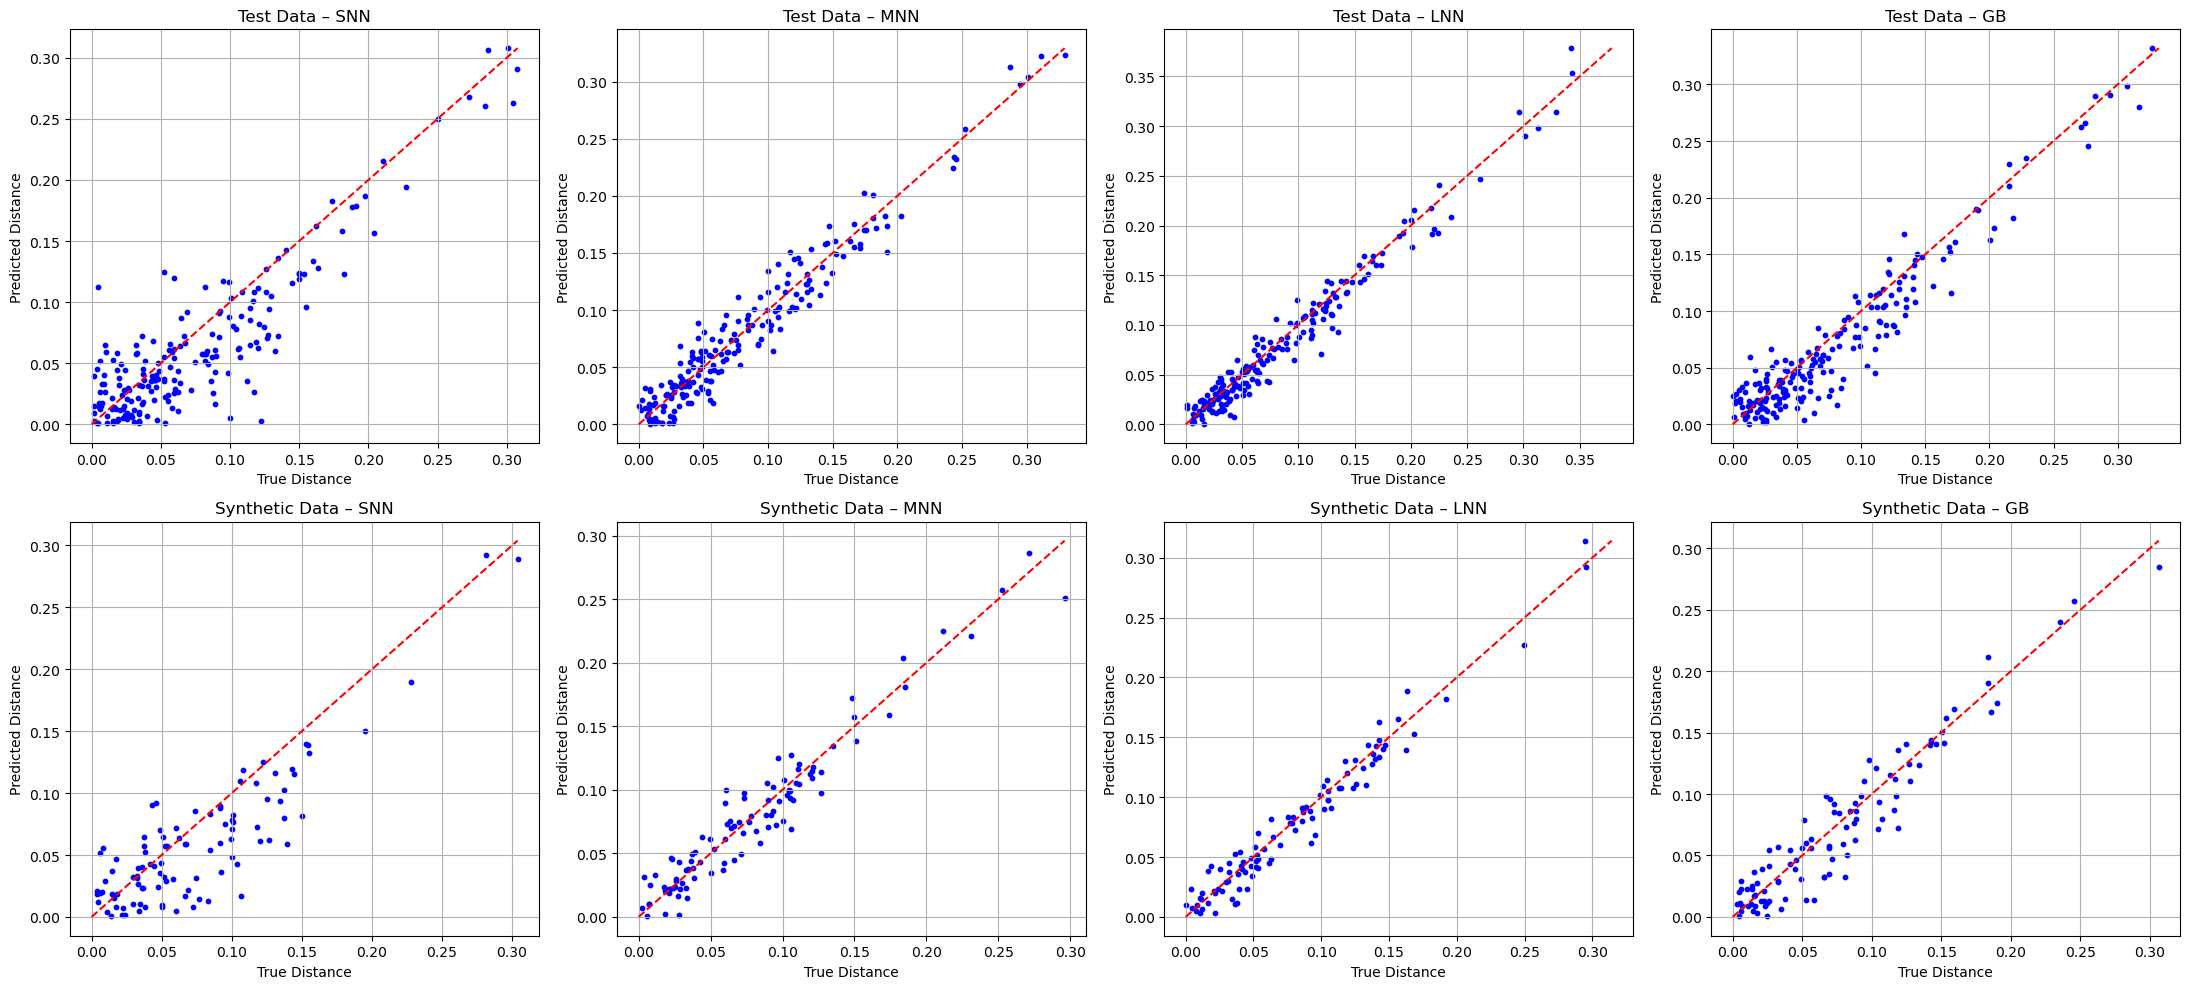


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.024865 0.001664   0.032464  0.001797
     Test Data   MNN  0.013133 0.001298   0.016640  0.001616
     Test Data   LNN  0.014393 0.002751   0.018506  0.003340
     Test Data    GB  0.015446 0.000860   0.019857  0.001158
Synthetic Data   SNN  0.027238 0.002656   0.034410  0.002684
Synthetic Data   MNN  0.012747 0.001439   0.017294  0.002336
Synthetic Data   LNN  0.013750 0.003477   0.017831  0.004831
Synthetic Data    GB  0.014438 0.000753   0.018306  0.001036


In [7]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS3_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

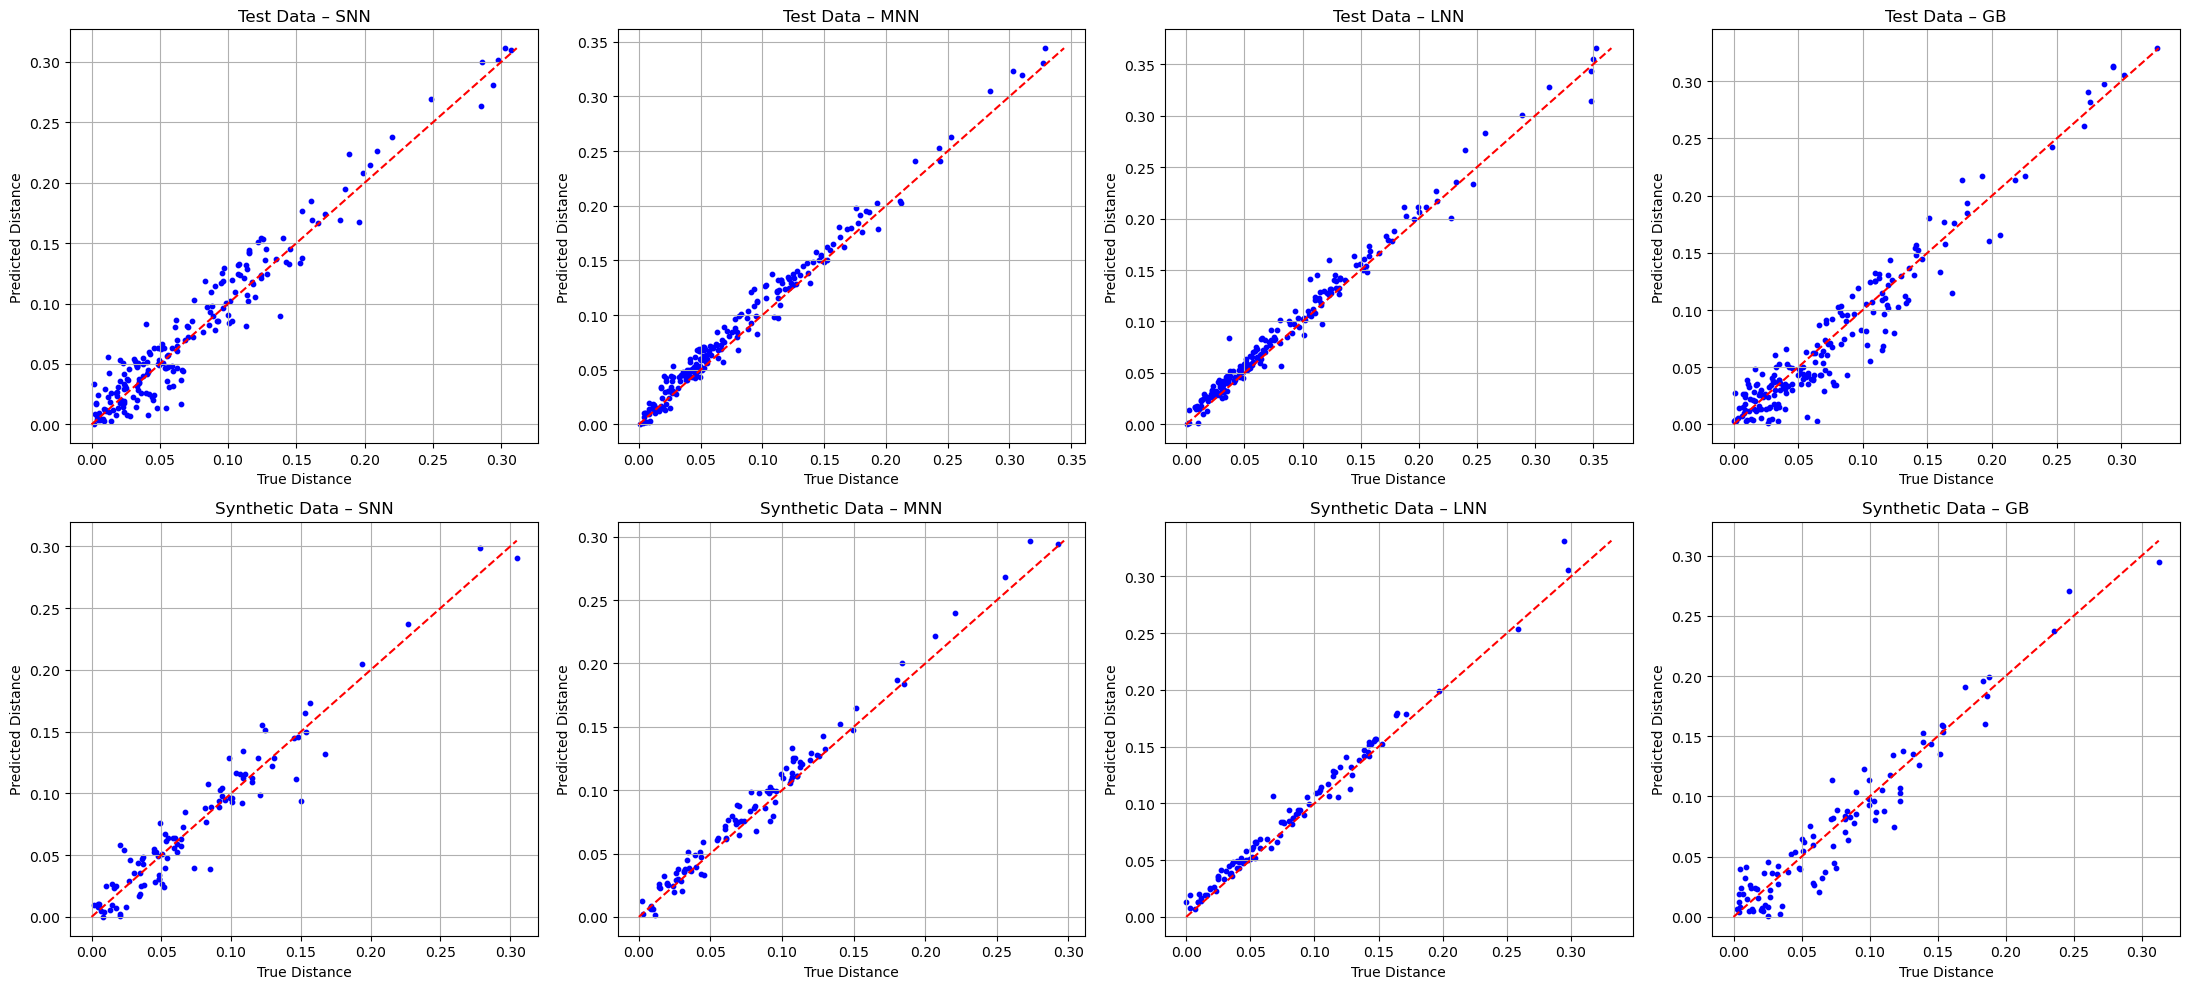


=== Final Distance Prediction Results ===
       Dataset Model  MAE_mean  MAE_std  RMSE_mean  RMSE_std
     Test Data   SNN  0.014480 0.000896   0.018319  0.001311
     Test Data   MNN  0.008305 0.000632   0.010353  0.000697
     Test Data   LNN  0.007703 0.000670   0.009710  0.001018
     Test Data    GB  0.013463 0.000749   0.017244  0.001042
Synthetic Data   SNN  0.015382 0.001972   0.019294  0.002306
Synthetic Data   MNN  0.007891 0.000377   0.009839  0.000337
Synthetic Data   LNN  0.007259 0.000677   0.009081  0.001091
Synthetic Data    GB  0.012501 0.000846   0.016030  0.001005


In [8]:
evaluate_distance_prediction_general(folder_path="../results", file_prefix="results_DS3_3", test_data=X_test, synthetic_data=Syn_test, 
                                     model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)